# Import required library


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler, normalize,PowerTransformer
from sklearn.cluster import  FeatureAgglomeration
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

# Helper Functions

In [0]:
def finding_num_hier_cluster(X, min_clusters =2, max_clusters =30, title = None):
  
    """
    Plots the silhouette score for a range of cluster values, using
    AgglomerativeClustering model
    
    """
    
    silh = []
    clusters = range(min_clusters,max_clusters)
    for n in clusters:

        model = AgglomerativeClustering(n_clusters = n, affinity = 'euclidean', 
                                        linkage = 'ward')
        preds = model.fit_predict(X)

        silhouette_avg = silhouette_score(X, preds)

        silh.append(silhouette_avg)
       
    fig, (ax1) = plt.subplots(sharex=False, figsize=(6,5))
    ax1.plot(clusters, silh,marker="o")
    ax1.set_ylabel("Silhoutte Score")
    ax1.set_xlabel('number of clusters')
    
    plt.show()

In [0]:
def finding_num_cluster(X, min_clusters =2, max_clusters =30, title = None):
  
    """
    Plots the silhouette score for a range of cluster values, using KMeans
    clustering model.
  
    """
    silh = []
    inertia = []
    clusters = range(min_clusters,max_clusters)
    for n in clusters:

        model = KMeans(n_jobs = -1, n_clusters = n, init = 'k-means++', random_state=42)
        preds = model.fit_predict(X)

        silhouette_avg = silhouette_score(X, preds)

        silh.append(silhouette_avg)
        inertia.append(model.inertia_)

    fig, (ax1,ax2) = plt.subplots(2,1, sharex=False, figsize=(8,7))
    ax1.plot(clusters, silh,marker="o")
    ax1.set_ylabel("Silhoutte Score")
    ax1.set_xlabel('number of clusters')
    ax1.set_title(title)
    ax2.plot(clusters, inertia, marker="o")
    ax2.set_ylabel("Inertia (SSE)")
    ax2.set_xlabel("number of clusters")
    
    plt.show()

In [0]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    
    """
    Plots intra cluster silhoutte score 
    
    reference:
    https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    
    """
    
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

In [0]:
def get_bar_plots(df, plot_cols, grid_col, layout=221):
  
    """
    Generates conditional barplot for list columns
    
    """
    fig = plt.figure(figsize = (18,14))
    for i in range(len(plot_cols)):
        ax = sns.barplot(x=grid_col, y = plot_cols[i], data = df, ax = plt.subplot(layout+i))
        plt.ylabel('Mean Value')
        plt.xlabel(grid_col)
        plt.title("Feature:" +plot_cols[i])
    return 'Cluster Analysis'
  
def get_box_plots(df, plot_cols, grid_col, layout=221):
  
    """
    Generates conditional box plot for list columns
    
    """
    fig = plt.figure(figsize = (18,14))
    for i in range(len(plot_cols)):
        ax = sns.boxplot(x=grid_col, y = plot_cols[i], data = df, ax = plt.subplot(layout+i))
        plt.ylabel(plot_cols[i])
        plt.xlabel(grid_col)
    return 'Cluster Analysis'
  
 
 ## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1 = (grid1.map(plt.hist, col, alpha=.7).set(xlim=(0, 30), ylim=(0, 5000),xticks=[5, 10, 15,20,30]))
    return grid_col
  
 # function to generate Conditioned Boxplot
def plt_box(df, cols, cond_col):
#import matplotlib.pyplot as plt
## Loop over the columns and create the box plots
    for col in cols:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        df.boxplot(column = col , by = cond_col,showmeans=True, ax = ax)
        print('Average of ',col,df[col].mean())
        ax.set_ylabel(col)
        ax.set_xlabel(cond_col)
        #ax.set_ylim(df[col].min(),200)
        #ax.set_yticks([25,50,75,100,150,200])
        ax.set_title(col +  ' vs '+ cond_col)
    return 'Done'
 
 
def get_violin_plots(df, plot_cols, grid_col, layout=221):
  
  """
  Plots violin plots that display kernel density
  """
  
  fig = plt.figure(figsize = (18,14))
    
  for i in range(len(plot_cols)):
    ax = sns.violinplot(y=grid_col, x = plot_cols[i], data = df, inner =None, scale ='area', ax = plt.subplot(layout+i))
    plt.xlabel(plot_cols[i])
    plt.ylabel(grid_col)
  return 'Done'


# Processing Customer with Demographic features





*   Read consolidated dataset, aggregated at client level. 
*   For clustering we will consider clients whose demographic(age, gender, income) information is not missing.  

*   we got 14820 clients with demographic information







In [0]:
person_df = pd.read_csv("data/sbucks_consolidated.csv", index_col = 'person')
reg_profile = person_df[~person_df.age.isnull()]
reg_profile.replace([np.inf, -np.inf, np.nan], 0, inplace = True)

In [9]:
reg_profile.shape

(14820, 148)

Drop Informational offer related columns, will also drop age and income fields as we will be using income_bins and age_bins

In [10]:
drop_col_list =[]
info_list = []
for i in range(reg_profile.shape[1]):
    if 'informational' in reg_profile.columns[i] :
      drop_col_list.append(reg_profile.columns[i])
        
drop_col_list.append('age')
drop_col_list.append('income')
print(drop_col_list)
                                    

['total_informational_recieved', 'total_informational_viewed', 'total_informational_completed', 'total_informational_success', 'total_informational_invalid_complete', 'total_informational_actual_reward', 'total_informational_invalid_reward', 'total_informational_duration_hours', 'total_informational_participated_duration', 'total_informational_tranx_from_view_to_complete', 'total_informational_np_tranx_in_duration', 'total_informational_spent_from_view_to_complete', 'total_informational_np_spent_in_duration', 'mean_informational_tranx_from_view_to_complete', 'mean_informational_spent_from_view_to_complete', 'mean_informational_np_tranx_in_duration', 'mean_informational_np_spent_in_duration', 'mean_informational_spend_per_tranx_in_promo', 'mean_informational_spend_per_tranx_in_np', 'mean_informational_spend_per_tranx_in_duration', 'mean_informational_rate_of_completion', 'mean_informational_perc_spend_in_promo', 'mean_informational_perc_tranx_in_promo', 'mean_informational_per_hour_spen

Remove outliers using zscore 

In [11]:

reg_clean = reg_profile[(np.abs(stats.zscore(reg_profile[['mean_spend_per_tranx_in_promo', 'mean_per_hour_spend_in_promo']])) < 3).all(axis=1)]
print("number of outliers removed:", reg_profile.shape[0]-reg_clean.shape[0])

number of outliers removed: 437


Drop the columns identified in earlier step and one hot encode gender, income_bins and age_bins

In [12]:
reg_std = reg_clean.drop(columns = drop_col_list, axis =1)
reg_std = pd.get_dummies(reg_std, columns = ['gender', 'income_bins', 'age_bins'])
print(reg_std.shape)


(14383, 134)


# Dimension Reduction and Scaling

For scaling the dataset, following approaches are considered


*   PowerTransformer
*   StandardScaler
*   Normalizer







In [0]:

std_scaler = StandardScaler()
reg_scaled = pd.DataFrame(std_scaler.fit_transform(reg_std), columns=reg_std.columns, index=reg_std.index)

In [0]:
reg_norm = pd.DataFrame(normalize(reg_std, axis =0), columns=reg_std.columns, index=reg_std.index)

In [0]:

powerT = PowerTransformer()
reg_power = pd.DataFrame(powerT.fit_transform(reg_std), columns=reg_std.columns, index=reg_std.index)

For Dimensional reduction, following approaches are considered.


*   Principal Component Analysis (PCA)
*   Agglomeration Clustering





In [0]:
#Reduce number of dimensions to 7 features
agglo = FeatureAgglomeration(n_clusters=7)
reg_agglo = agglo.fit_transform(reg_power)

In [17]:
#reduce dimensions for explained variance of 95% 
pca_pt_gen = PCA(0.95)
pca_pt = pca_pt_gen.fit_transform(reg_power)
print(pca_pt.shape)

(14383, 39)


In [0]:
pca_scaled_gen = PCA(0.95)
pca_scaled = pca_scaled_gen.fit_transform(reg_scaled)

In [0]:
pca_norm_gen = PCA(0.95)
pca_norm = pca_norm_gen.fit_transform(reg_norm)

In [20]:
print(pca_scaled.shape,  pca_norm.shape)

(14383, 46) (14383, 45)


# Explore Clustering Strategies



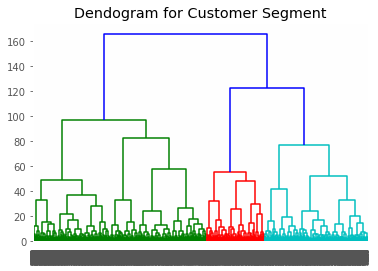

In [21]:
# for Hierarical clustering, estimate best number of clusters using dendogram
dendogram = sch.dendrogram(sch.linkage(reg_agglo, method = 'ward'))
plt.title('Dendogram for Customer Segment')
plt.show()

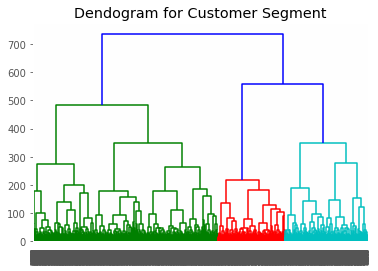

In [22]:
dendogram = sch.dendrogram(sch.linkage(pca_pt, method = 'ward'))
plt.title('Dendogram for Customer Segment')
plt.show()

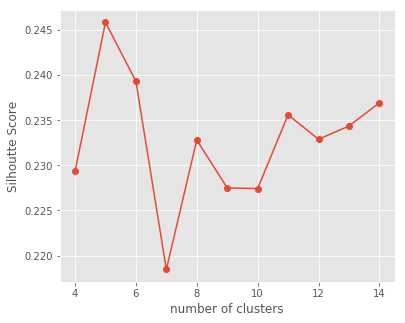

In [23]:
finding_num_hier_cluster(reg_agglo, min_clusters =4, max_clusters =15, title = 'Hierical Clustering')

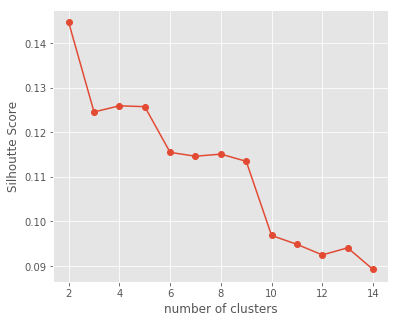

In [24]:
finding_num_hier_cluster(pca_pt, min_clusters =2, max_clusters =15, title = 'Hierarical Cluster with PCA PT')

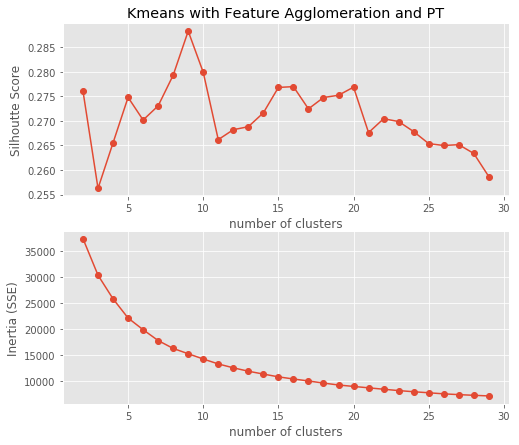

In [25]:
finding_num_cluster(reg_agglo,  max_clusters =30, title = 'Kmeans with Feature Agglomeration and PT')

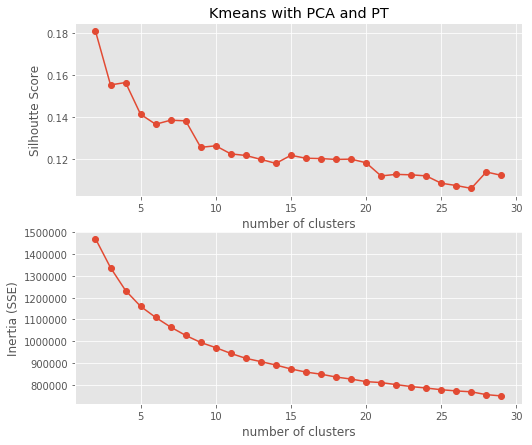

In [26]:
finding_num_cluster(pca_pt,  max_clusters =30, title = 'Kmeans with PCA and PT')

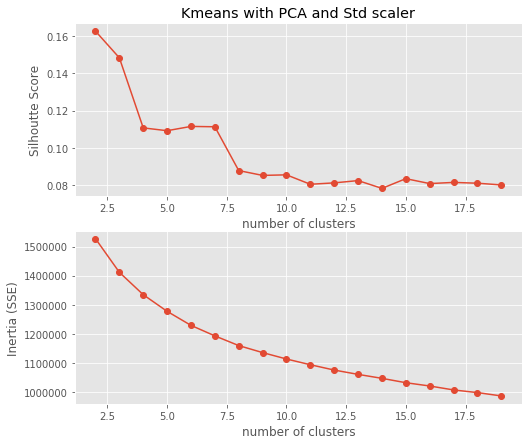

In [27]:
finding_num_cluster(pca_scaled,  max_clusters =20, title = 'Kmeans with PCA and Std scaler')

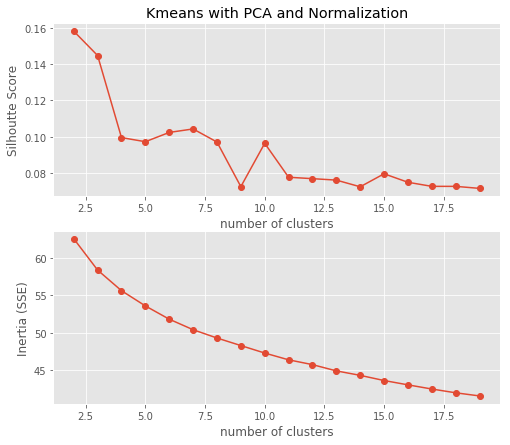

In [28]:
finding_num_cluster(pca_norm,  max_clusters =20, title = 'Kmeans with PCA and Normalization')

From above explorations we can conclude that Kmeans clustering on Agglomeration reduced dataset has best silhoutte score between 0.26 to 0.27. 

For intuitive clustering we will consider 8 clusters for KMeans model with agglomeration reduced dataset as there is only a slight improvement with number of clusters increased after that for this model. 

# Determine best fitting clustering parameters

In [29]:
kmeans_ag= KMeans(n_jobs = -1, n_clusters = 9, init = 'k-means++', random_state=42)
cluster_ag = kmeans_ag.fit_predict(reg_agglo)
silhouette_avg = silhouette_score(reg_agglo, cluster_ag)
sse = kmeans_ag.inertia_

print("The silhouette index is" ,silhouette_avg)
print("The SSE / inertia value is", sse)

The silhouette index is 0.28824992428737195
The SSE / inertia value is 15272.047621482003


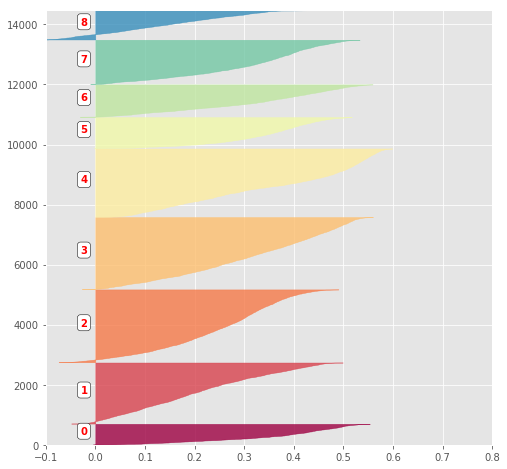

In [30]:
sample_silhouette_values_ag = silhouette_samples(reg_agglo, cluster_ag)
graph_component_silhouette(9, [-0.1, 0.8], len(reg_agglo), sample_silhouette_values_ag, cluster_ag)

There is good intra cluster silhoutte score, except for cluster segment 1,2 and 6 is poor

In [31]:
n_cluster =8
kmeans_pt= KMeans(n_jobs = -1, n_clusters = n_cluster, init = 'k-means++', random_state=42)
cluster_pt = kmeans_pt.fit_predict(pca_pt)
silhouette_avg = silhouette_score(pca_pt, cluster_pt)
sse = kmeans_pt.inertia_

print("The silhouette index is" ,silhouette_avg)
print("The SSE / inertia value is", sse)

The silhouette index is 0.1382039274285172
The SSE / inertia value is 1026990.6624884848


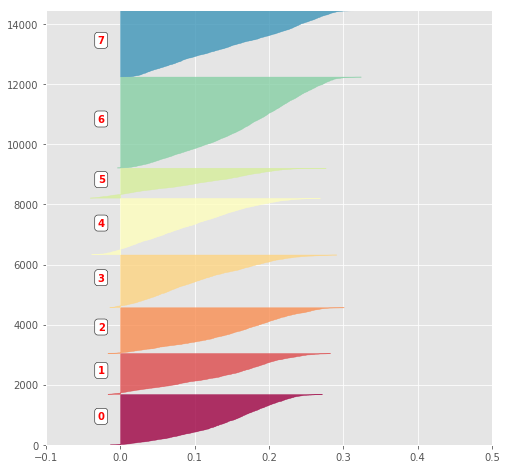

In [32]:
sample_silhouette_values_pt = silhouette_samples(pca_pt, cluster_pt)
graph_component_silhouette(n_cluster, [-0.1, 0.5], len(pca_pt), sample_silhouette_values_pt, cluster_pt)

In [33]:

kmeans_reg = KMeans(n_jobs = -1, n_clusters = 6, init = 'k-means++', random_state=42)
cluster_scaled = kmeans_reg.fit_predict(pca_scaled)
silhouette_avg = silhouette_score(pca_scaled, cluster_scaled)
sse = kmeans_reg.inertia_

print("The silhouette index is" ,silhouette_avg)
print("The SSE / inertia value is", sse)

The silhouette index is 0.1114535659382126
The SSE / inertia value is 1228653.388816506


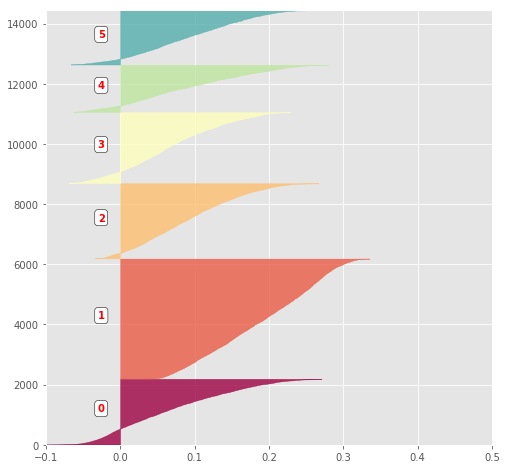

In [34]:
sample_silhouette_values_sc = silhouette_samples(pca_scaled, cluster_scaled)
graph_component_silhouette(6, [-0.1, 0.5], len(pca_scaled), sample_silhouette_values_sc, cluster_scaled)

In [35]:
kmeans_reg = KMeans(n_jobs = -1, n_clusters = 7, init = 'k-means++', random_state=42)
cluster_norm = kmeans_reg.fit_predict(pca_norm)
silhouette_avg = silhouette_score(pca_norm, cluster_norm)
sse = kmeans_reg.inertia_

print("The silhouette index is" ,silhouette_avg)
print("The SSE / inertia value is", sse)

The silhouette index is 0.10423131946729995
The SSE / inertia value is 50.42812039137577


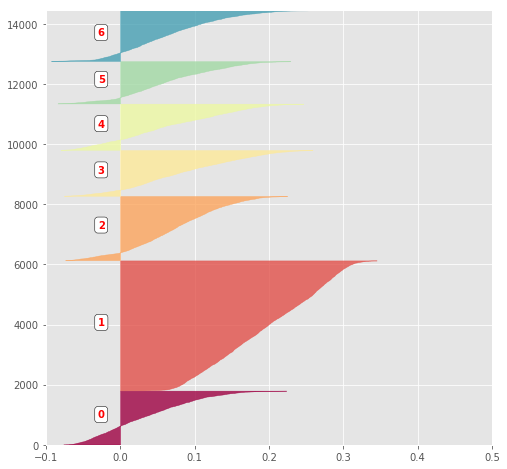

In [36]:
sample_silhouette_values_norm = silhouette_samples(pca_norm, cluster_norm)
graph_component_silhouette(7, [-0.1, 0.5], len(pca_norm), sample_silhouette_values_norm, cluster_norm)

# Visualize the cluster over TSNE map


In [37]:


time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter =500, n_iter_without_progress =200, random_state=42 )
tsne_pca_results = tsne.fit_transform(reg_agglo)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

tsne_df = pd.DataFrame(tsne_pca_results, columns=['xs', 'ys'])

t-SNE done! Time elapsed: 72.48100996017456 seconds


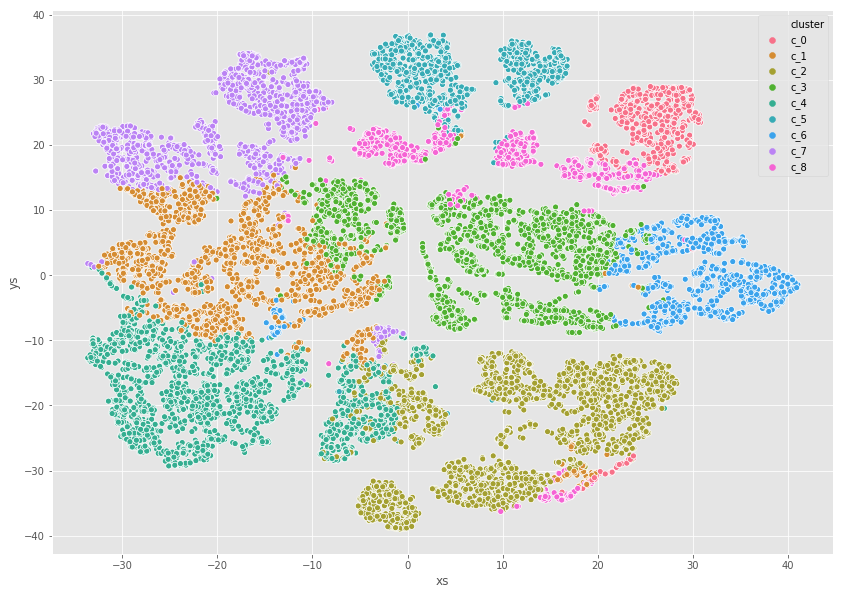

In [38]:
tsne_df['cluster'] = ['c_' + str(i) for i in cluster_ag]

#plot tsne
f,ax = plt.subplots(figsize=(14,10))
sns.scatterplot('xs','ys', hue='cluster', data=tsne_df, ax=ax, hue_order=['c_' + str(i) for i in range(9)])
#ax.set_title("Full Profile Cluster with TSNE"
                     

In [40]:
reg_clean['cluster'] = cluster_ag
reg_clean.groupby('cluster')['cluster'].count()

cluster
0     688
1    2033
2    2425
3    2399
4    2274
5    1036
6    1079
7    1476
8     973
Name: cluster, dtype: int64

# Demographic features by Cluster segments 

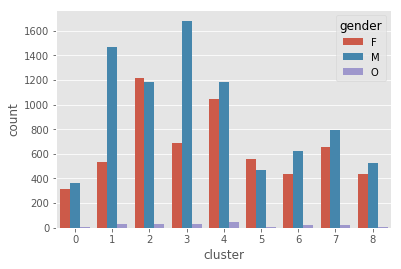

In [41]:
sns.countplot(data =reg_clean, x ='cluster', hue ='gender' , hue_order = ['F', 'M','O'])

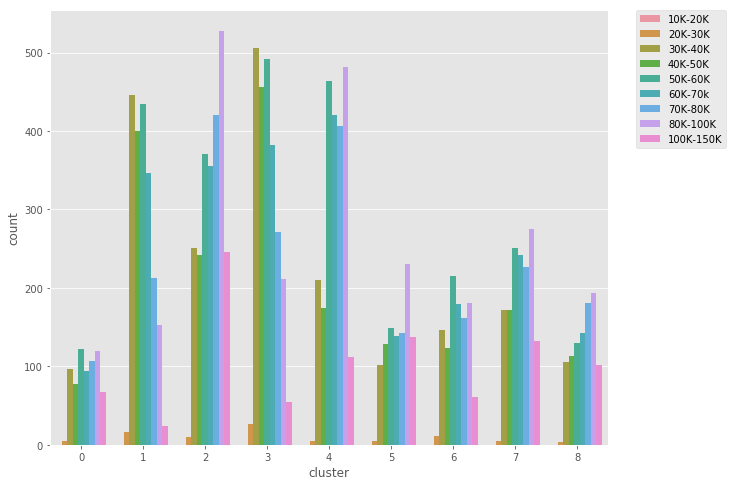

In [42]:
plt.figure(figsize = (10,8))
sns.countplot(data =reg_clean, x = 'cluster', hue = 'income_bins', 
hue_order = [ '10K-20K','20K-30K','30K-40K','40K-50K','50K-60K','60K-70k',
             '70K-80K','80K-100K', '100K-150K'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

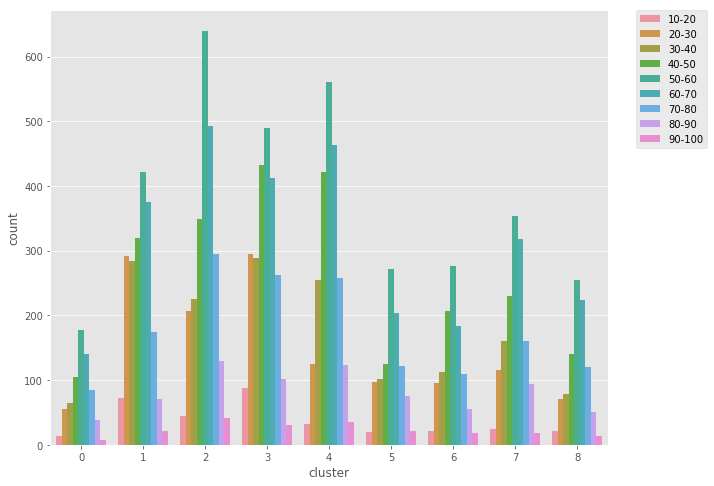

In [43]:
#plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,8))
sns.countplot(data =reg_clean, x ='cluster', hue ='age_bins' , hue_order = ['10-20', '20-30','30-40', '40-50', '50-60','60-70','70-80','80-90','90-100'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

'Cluster Analysis'

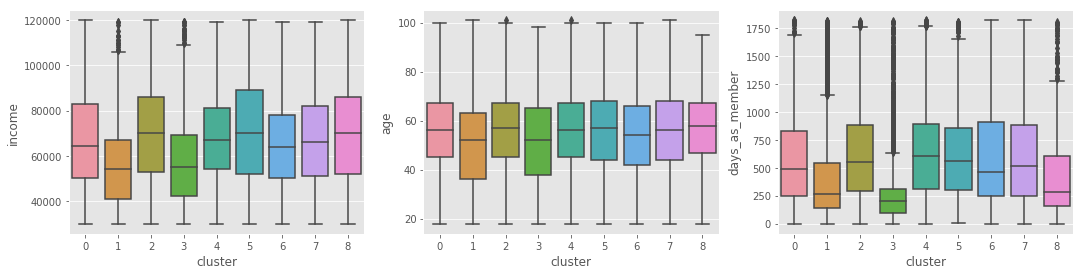

In [44]:
demo_cols = ['income', 'age', 'days_as_member']

get_box_plots(reg_clean,demo_cols, 'cluster', layout =331)

'Cluster Analysis'

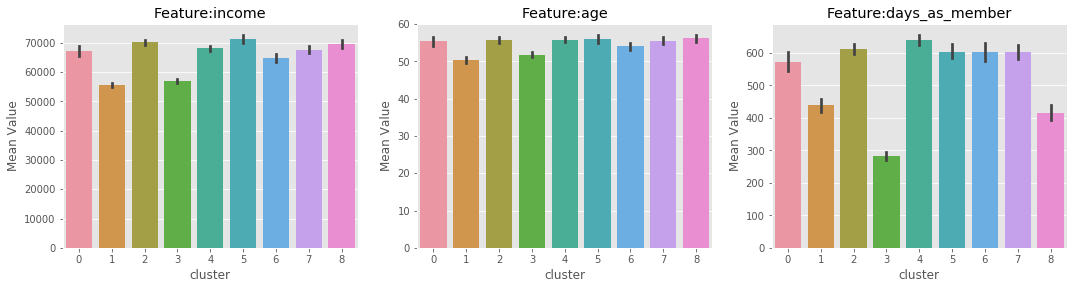

In [45]:
get_bar_plots(reg_clean,demo_cols, 'cluster', layout =331)

In [46]:
demo_cluster = demo_cols +['cluster']
reg_clean[demo_cluster].groupby('cluster').describe().T

cluster                           0  ...              8
income         count     688.000000  ...     973.000000
               mean    67287.790698  ...   69617.677287
               std     23301.298995  ...   22349.583547
               min     30000.000000  ...   30000.000000
               25%     50000.000000  ...   52000.000000
               50%     64500.000000  ...   70000.000000
               75%     83000.000000  ...   86000.000000
               max    120000.000000  ...  120000.000000
age            count     688.000000  ...     973.000000
               mean       55.373547  ...      56.211716
               std        16.777289  ...      16.744890
               min        18.000000  ...      18.000000
               25%        45.000000  ...      47.000000
               50%        56.000000  ...      58.000000
               75%        67.000000  ...      67.000000
               max       100.000000  ...      95.000000
days_as_member count     688.000000  ...     973.000000
               mean      572.520349  ...     415.238438
               std       404.153140  ...     375.880712
               min         0.000000  ...       0.000000
               25%       248.500000  ...     156.000000
               50%       489.500000  ...     286.000000
               75%       827.500000  ...     608.000000
               max      1822.000000  ...    1808.000000

[24 rows x 9 columns]

In [47]:
print(reg_clean[demo_cols].median(), reg_clean[demo_cols].mean())

income            63000.0
age                  55.0
days_as_member      354.0
dtype: float64 income            64846.276855
age                  54.241674
days_as_member      519.406522
dtype: float64


# Offer features by cluster segments


'Cluster Analysis'

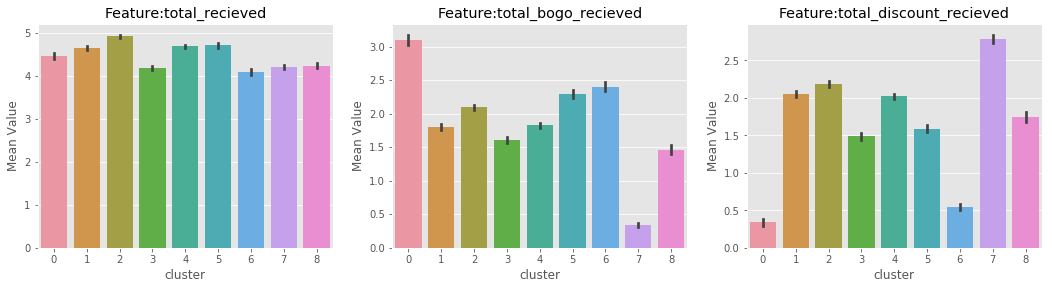

In [48]:
recieved_cols = ['total_recieved', 'total_bogo_recieved','total_discount_recieved']
get_bar_plots(reg_clean, recieved_cols, 'cluster', layout =331)


'Cluster Analysis'

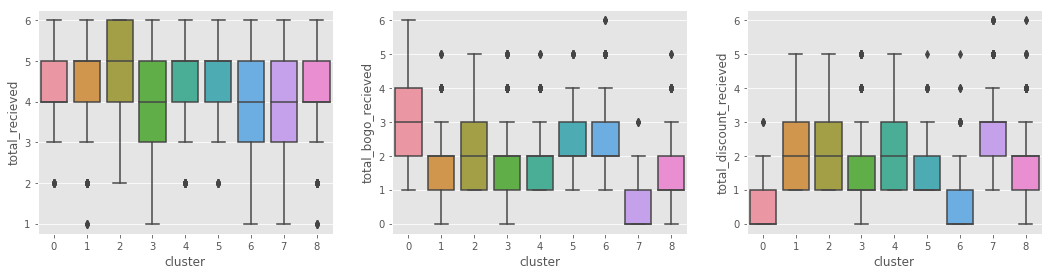

In [49]:
get_box_plots(reg_clean, recieved_cols, 'cluster', layout=331)

'Cluster Analysis'

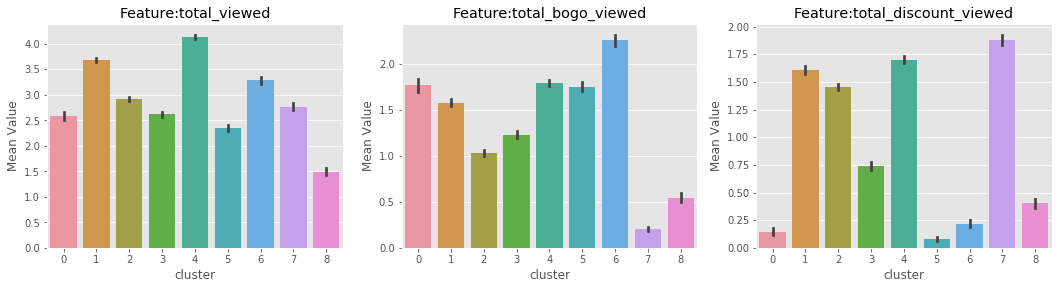

In [50]:
view_cols = ['total_viewed', 'total_bogo_viewed', 'total_discount_viewed']
get_bar_plots(reg_clean, view_cols, 'cluster', layout=331)

'Cluster Analysis'

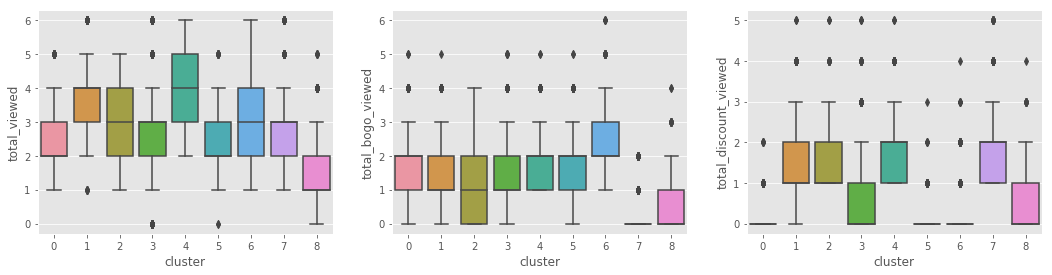

In [51]:
get_box_plots(reg_clean, view_cols, 'cluster', layout=331)

'Cluster Analysis'

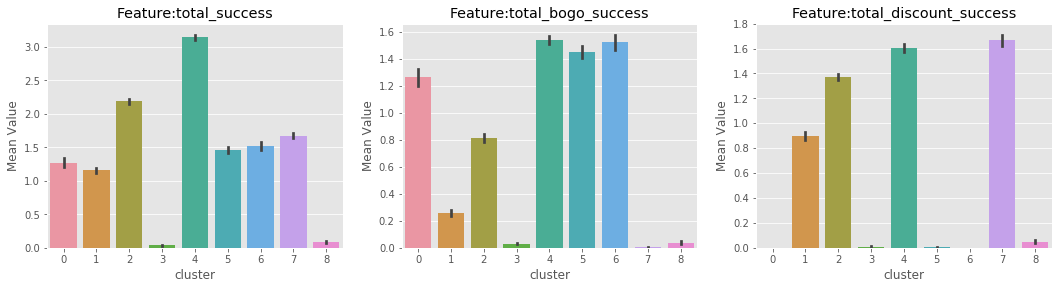

In [52]:
success_cols = ['total_success', 'total_bogo_success', 'total_discount_success']
get_bar_plots(reg_clean, success_cols, 'cluster', layout=331)

'Cluster Analysis'

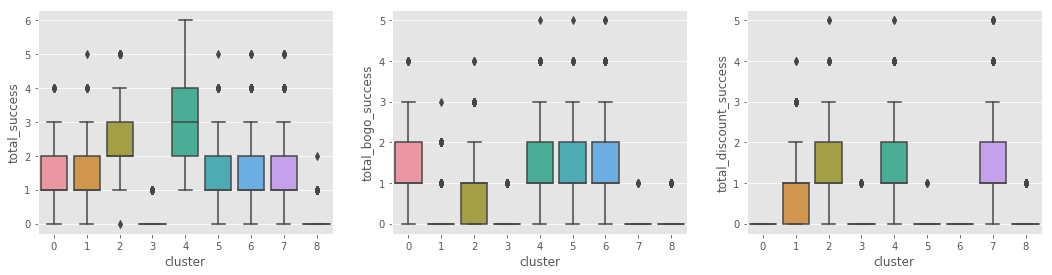

In [53]:
#plt.style.use('fivethirtyeight')
get_box_plots(reg_clean, success_cols, 'cluster', layout=331)

'Cluster Analysis'

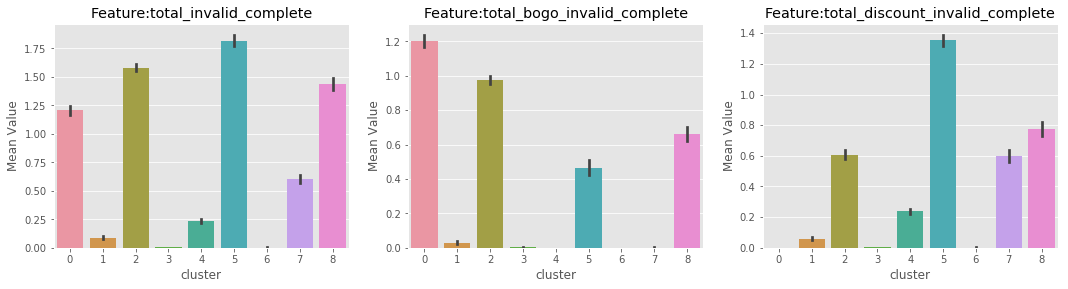

In [54]:
invalid_complete_cols = [ 'total_invalid_complete',
       'total_bogo_invalid_complete', 'total_discount_invalid_complete']
get_bar_plots(reg_clean, invalid_complete_cols, 'cluster',layout=331)

'Cluster Analysis'

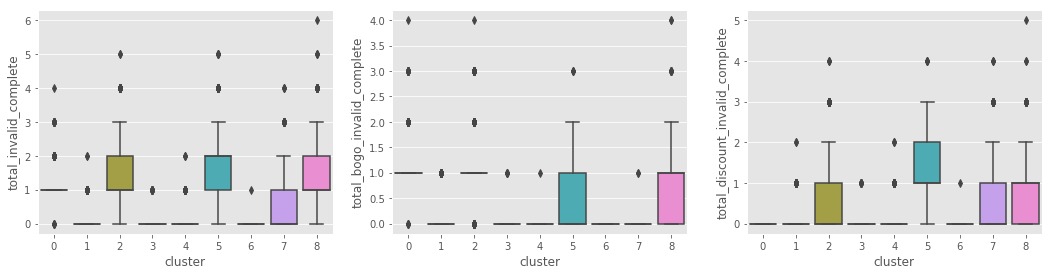

In [55]:
get_box_plots(reg_clean, invalid_complete_cols, 'cluster',layout=331)

'Cluster Analysis'

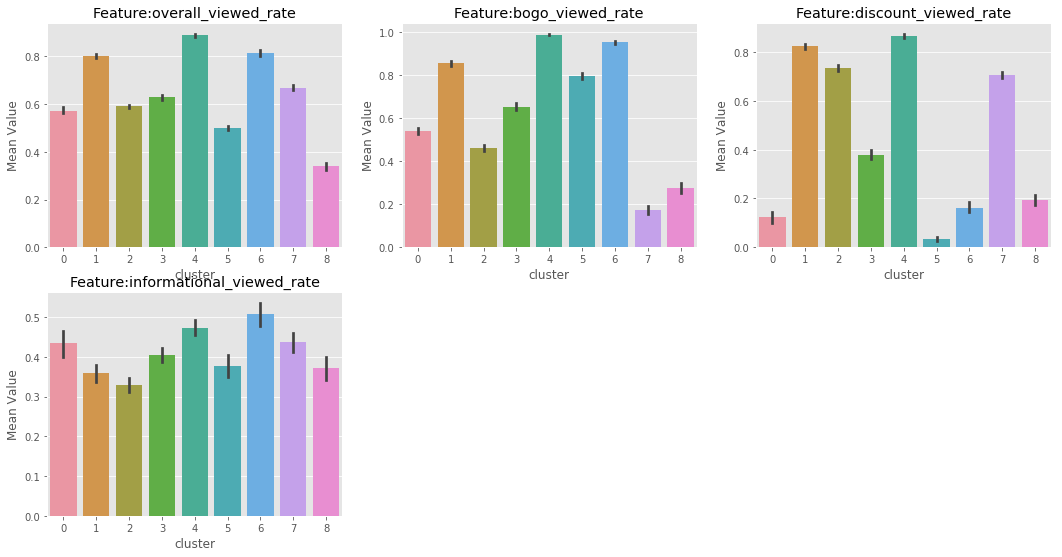

In [56]:
viewed_cols = ['overall_viewed_rate', 'bogo_viewed_rate',
       'discount_viewed_rate', 'informational_viewed_rate']
get_bar_plots(reg_clean, viewed_cols, 'cluster',layout=331)

'Cluster Analysis'

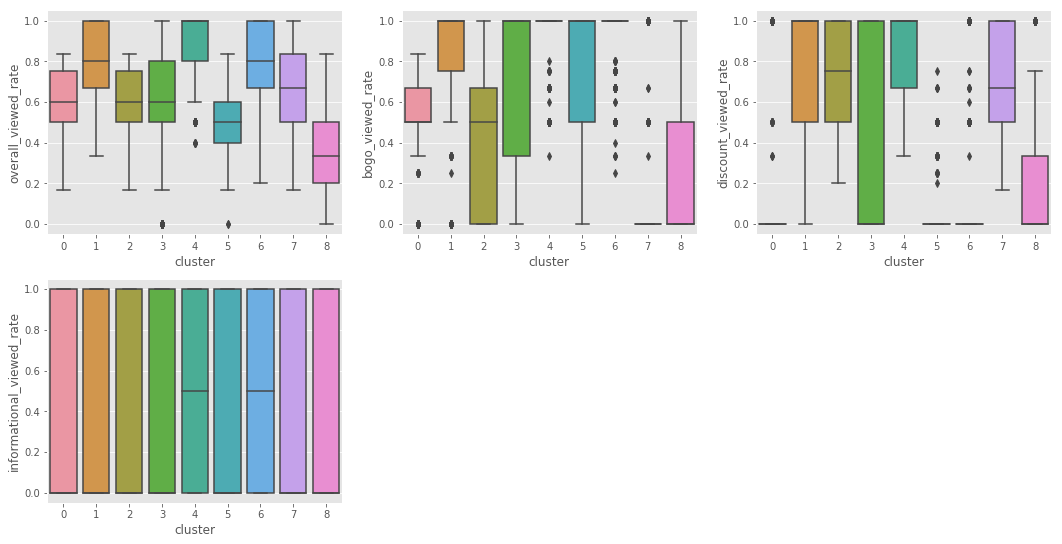

In [57]:
get_box_plots(reg_clean, viewed_cols, 'cluster',layout=331)

'Cluster Analysis'

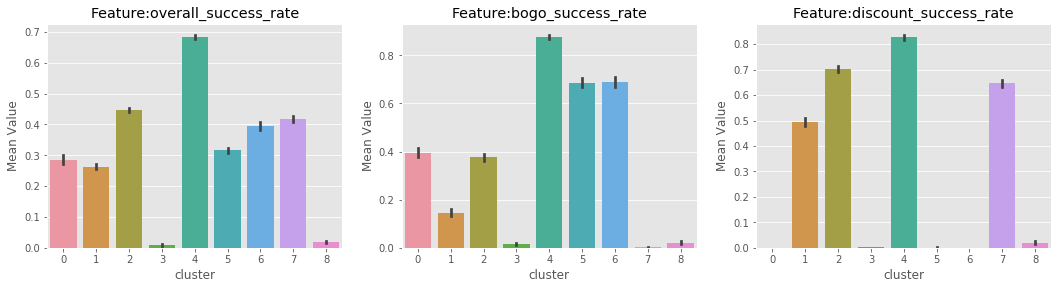

In [58]:
success_rate_cols = [ 'overall_success_rate',
       'bogo_success_rate', 'discount_success_rate']
get_bar_plots(reg_clean, success_rate_cols, 'cluster', layout=331)

'Cluster Analysis'

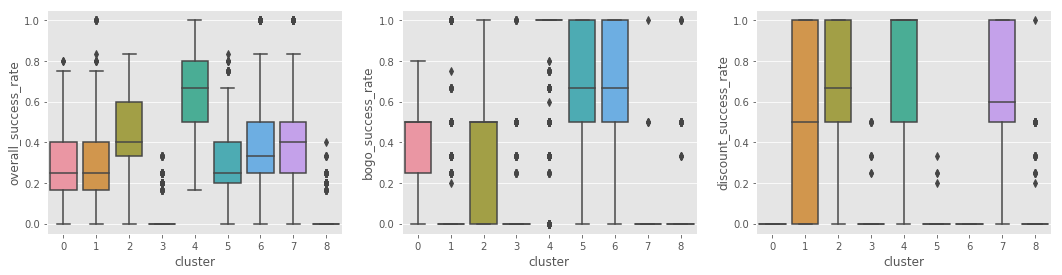

In [59]:
get_box_plots(reg_clean, success_rate_cols, 'cluster', layout =331)

'Cluster Analysis'

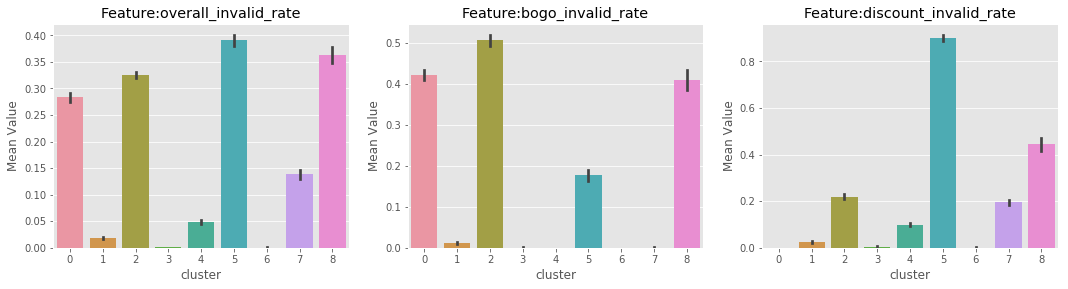

In [60]:
invalid_rate_cols = [ 'overall_invalid_rate',
       'bogo_invalid_rate', 'discount_invalid_rate']
get_bar_plots(reg_clean, invalid_rate_cols, 'cluster', layout=331)

'Cluster Analysis'

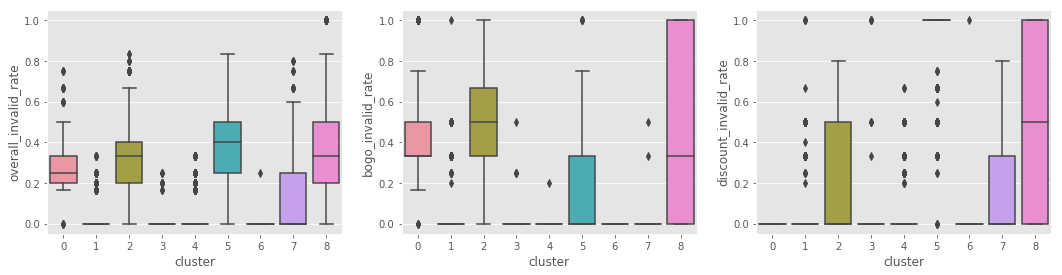

In [61]:
get_box_plots(reg_clean, invalid_rate_cols, 'cluster', layout=331)

'Cluster Analysis'

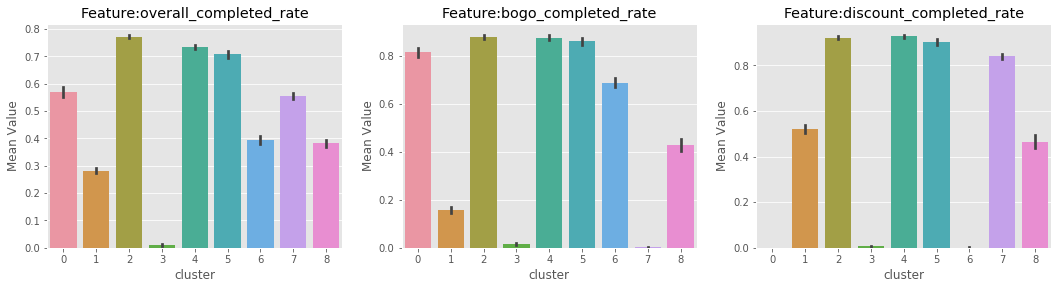

In [62]:
completed_rate_cols = [ 'overall_completed_rate',
       'bogo_completed_rate', 'discount_completed_rate']
get_bar_plots(reg_clean, completed_rate_cols, 'cluster', layout=331)

'Cluster Analysis'

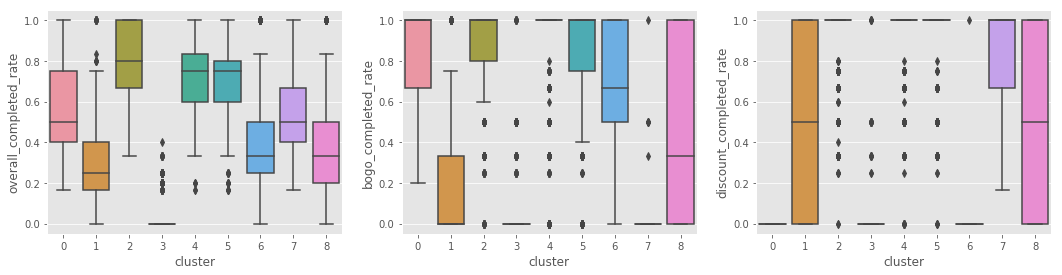

In [63]:
get_box_plots(reg_clean, completed_rate_cols, 'cluster', layout=331)

# Total Spending and transactions by Cluster Segments


'Cluster Analysis'

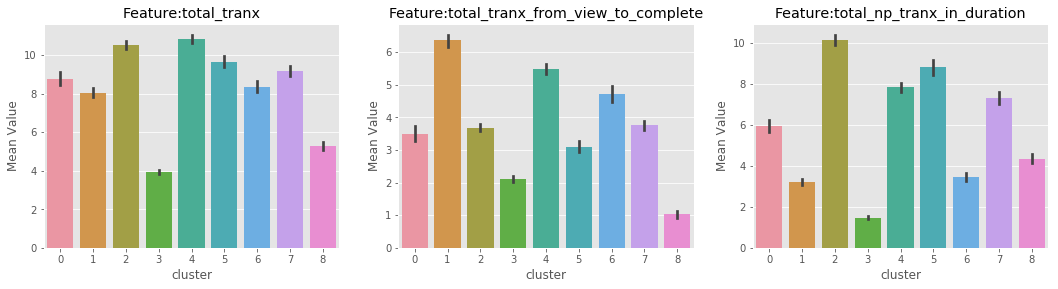

In [64]:
transactions_cols = ['total_tranx', 'total_tranx_from_view_to_complete', 'total_np_tranx_in_duration' ]

get_bar_plots(reg_clean, transactions_cols, 'cluster',layout=331)

'Cluster Analysis'

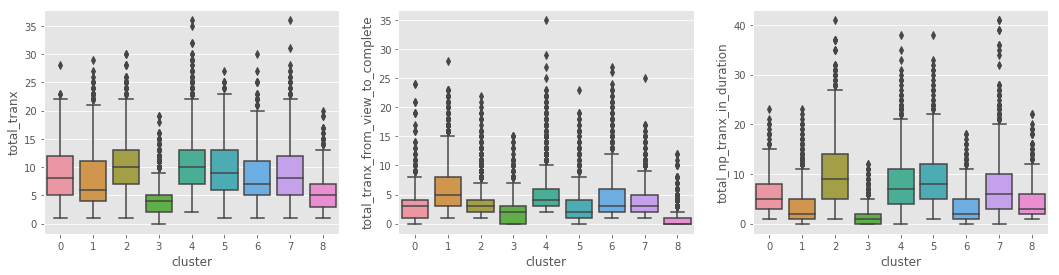

In [65]:
get_box_plots(reg_clean, transactions_cols, 'cluster',layout=331)

'Cluster Analysis'

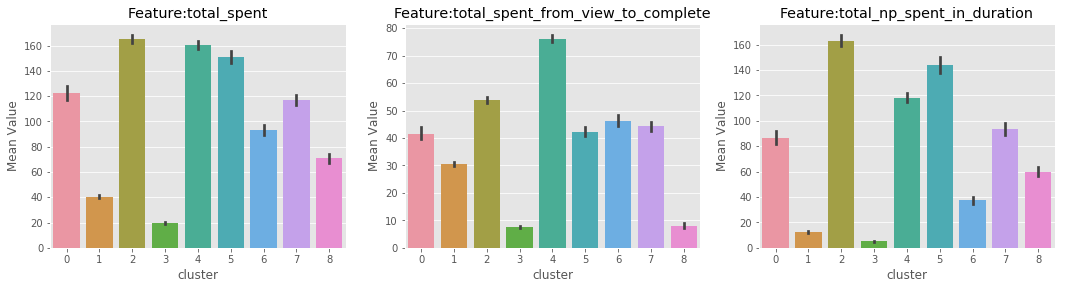

In [66]:
spent_cols = ['total_spent', 'total_spent_from_view_to_complete', 'total_np_spent_in_duration']

get_bar_plots(reg_clean, spent_cols, 'cluster', layout =331)

'Cluster Analysis'

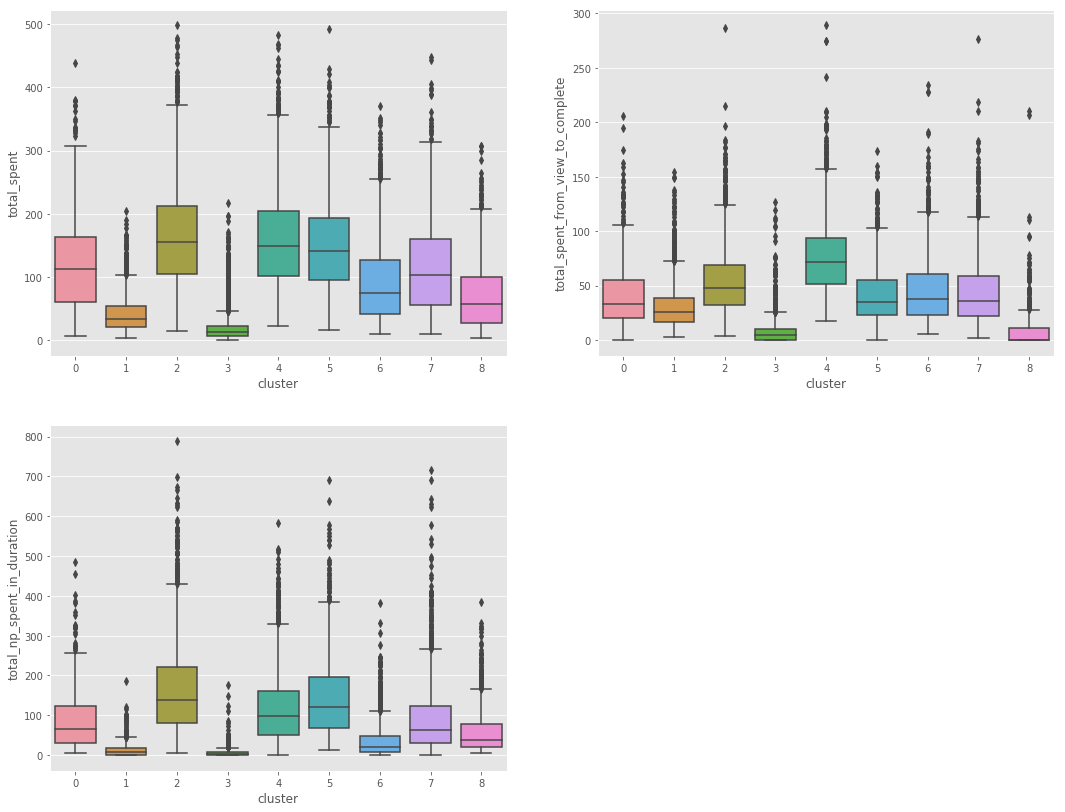

In [67]:

get_box_plots(reg_clean, spent_cols, 'cluster')

'Cluster Analysis'

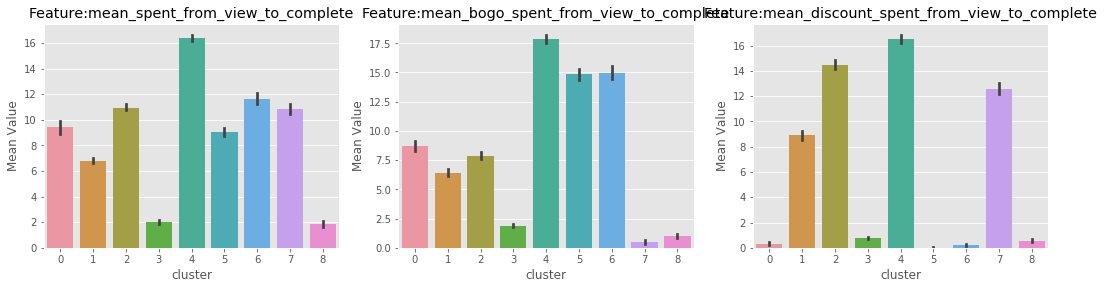

In [68]:
mean_spent_cols = ['mean_spent_from_view_to_complete', 'mean_bogo_spent_from_view_to_complete','mean_discount_spent_from_view_to_complete']

get_bar_plots(reg_clean, mean_spent_cols, 'cluster', layout=331)

# Channels viewed by cluster segments


'Cluster Analysis'

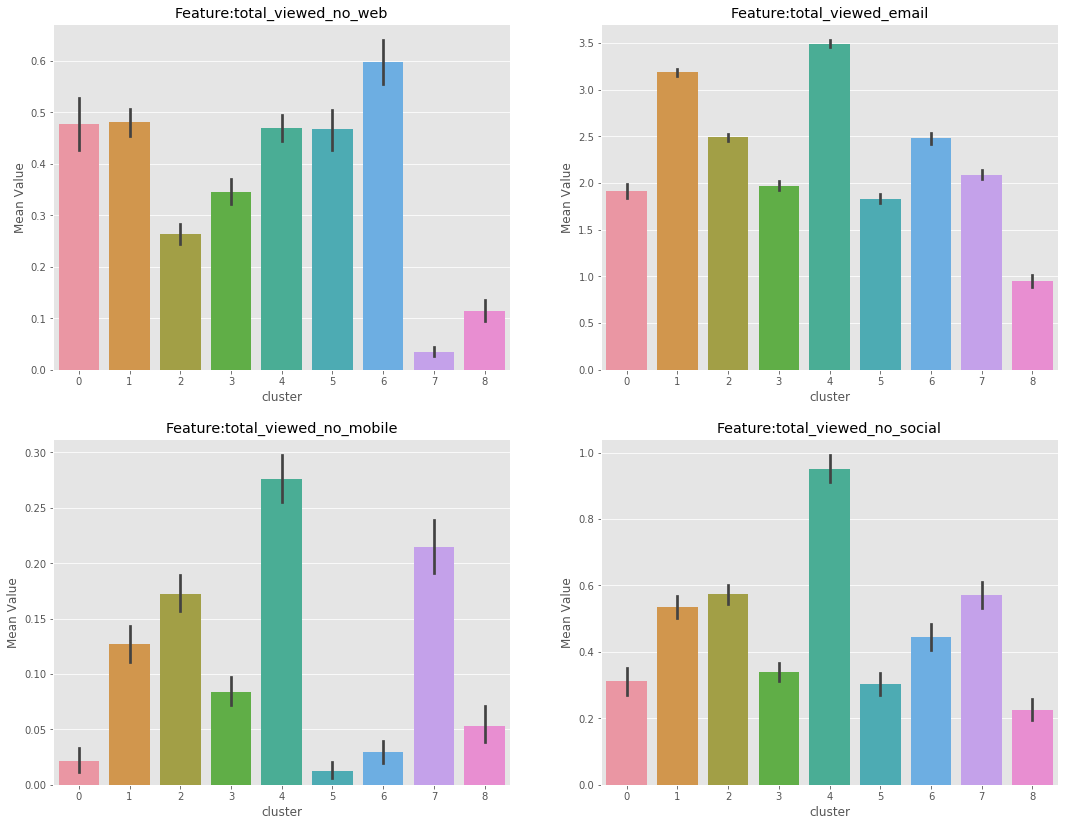

In [69]:
channels_for_viewed = ['total_viewed_no_web','total_viewed_email',
                       'total_viewed_no_mobile', 'total_viewed_no_social']
get_bar_plots(reg_clean, channels_for_viewed, 'cluster')

'Cluster Analysis'

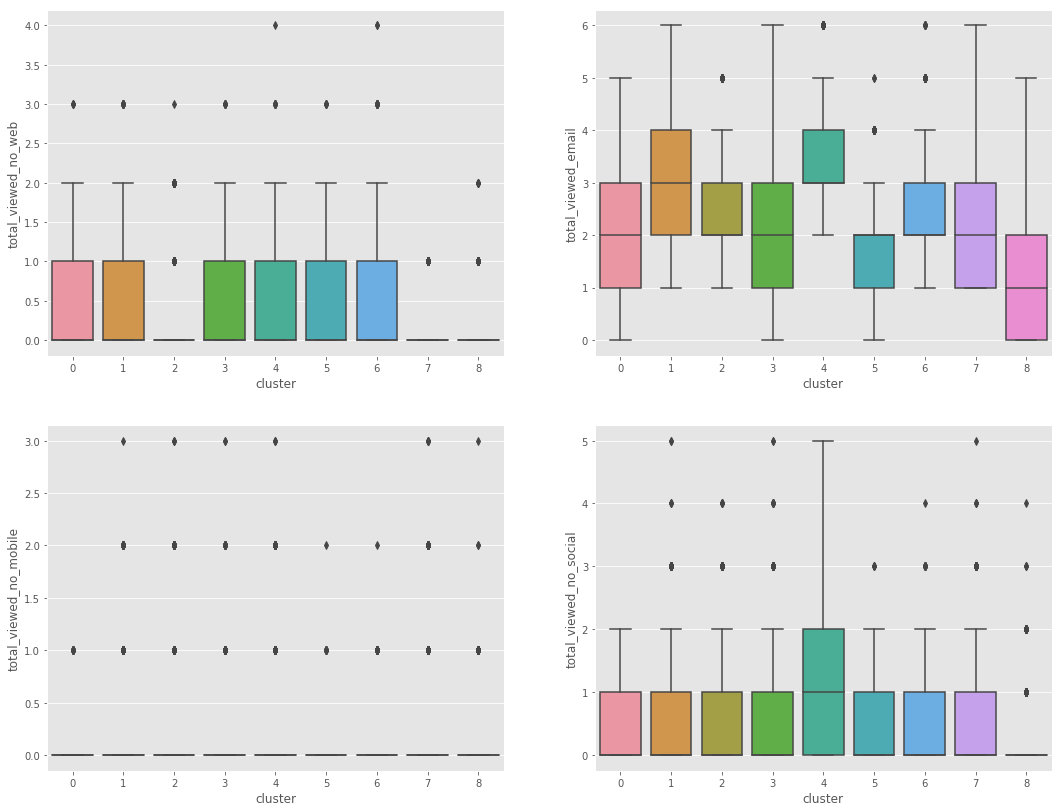

In [70]:
get_box_plots(reg_clean, channels_for_viewed, 'cluster')

'Cluster Analysis'

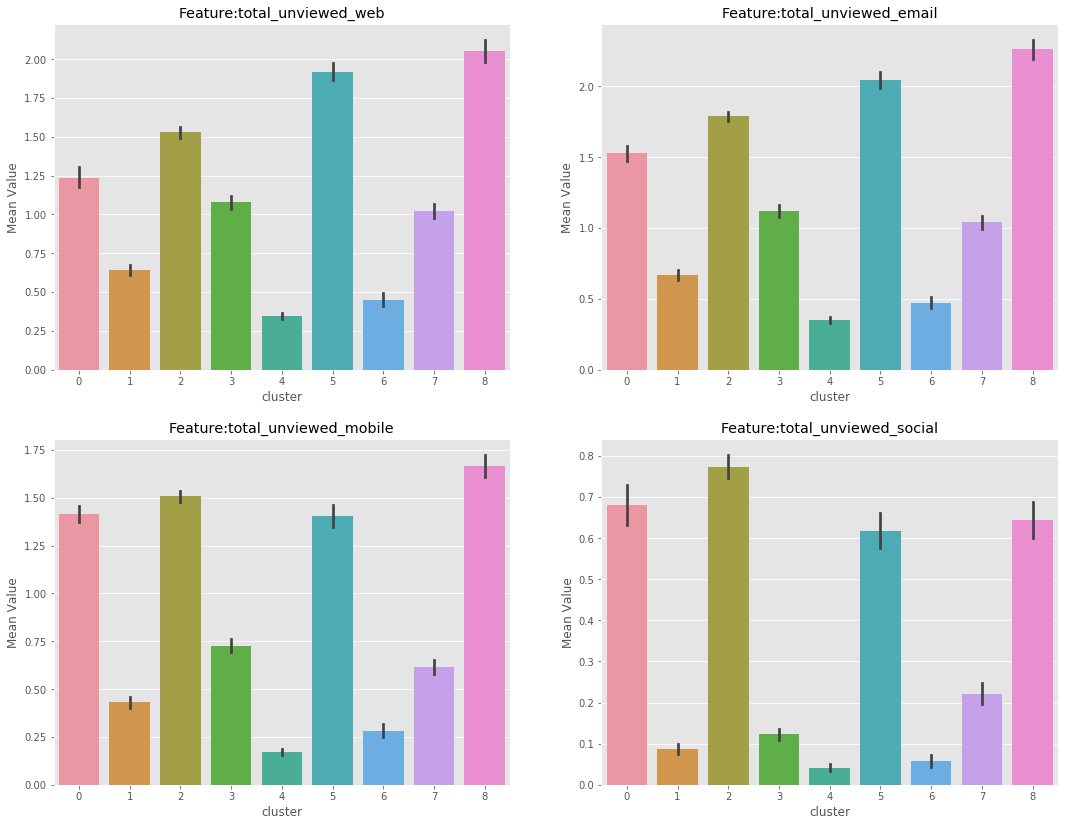

In [71]:
channels_for_unviewed = ['total_unviewed_web','total_unviewed_email',
                       'total_unviewed_mobile', 'total_unviewed_social']
get_bar_plots(reg_clean, channels_for_unviewed, 'cluster')

'Cluster Analysis'

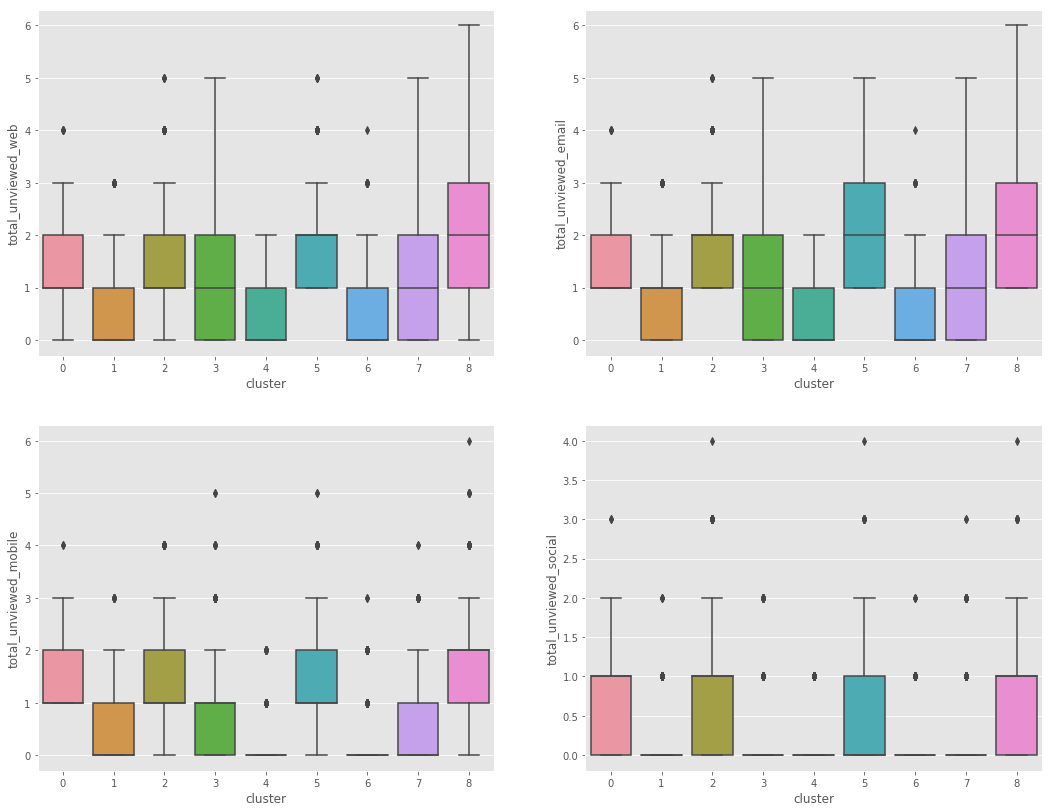

In [72]:
get_box_plots(reg_clean, channels_for_unviewed, 'cluster')

# Rate of completion by cluster segments

'Cluster Analysis'

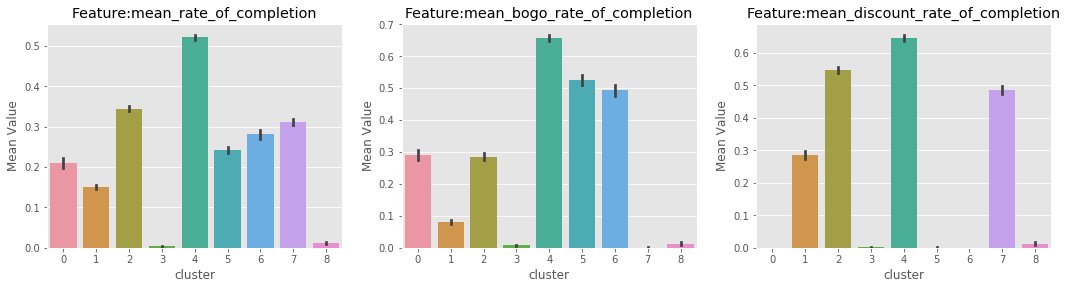

In [73]:
rate_of_completion_cols =['mean_rate_of_completion', 'mean_bogo_rate_of_completion', 'mean_discount_rate_of_completion'] 
get_bar_plots(reg_clean, rate_of_completion_cols , 'cluster',layout=331)

'Cluster Analysis'

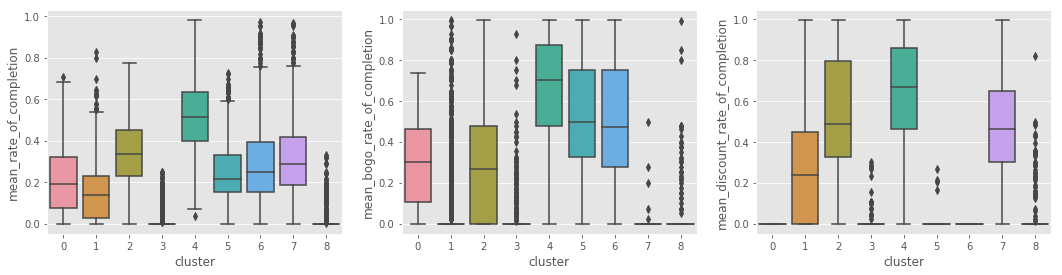

In [74]:
get_box_plots(reg_clean, rate_of_completion_cols , 'cluster',layout=331)

# Difficulty , earned and invalid rewards by cluster segments

'Cluster Analysis'

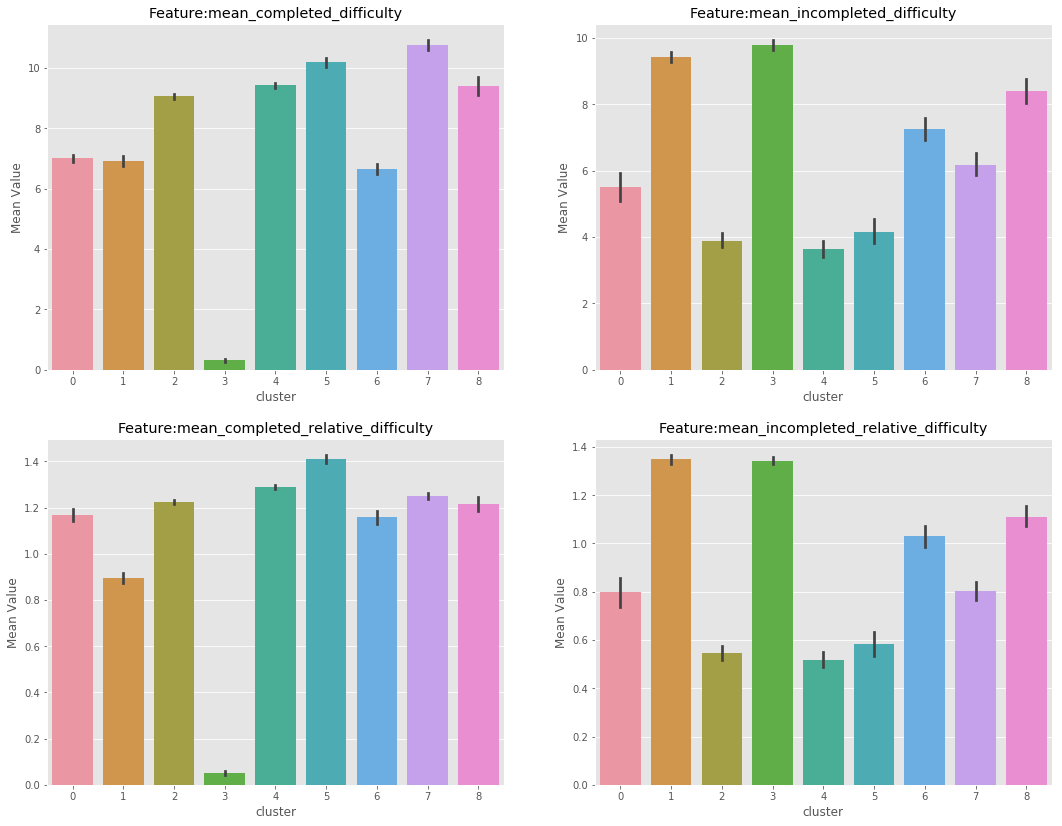

In [75]:
difficulty_cols = ['mean_completed_difficulty', 'mean_incompleted_difficulty',
                   'mean_completed_relative_difficulty','mean_incompleted_relative_difficulty']

get_bar_plots(reg_clean, difficulty_cols , 'cluster')

'Cluster Analysis'

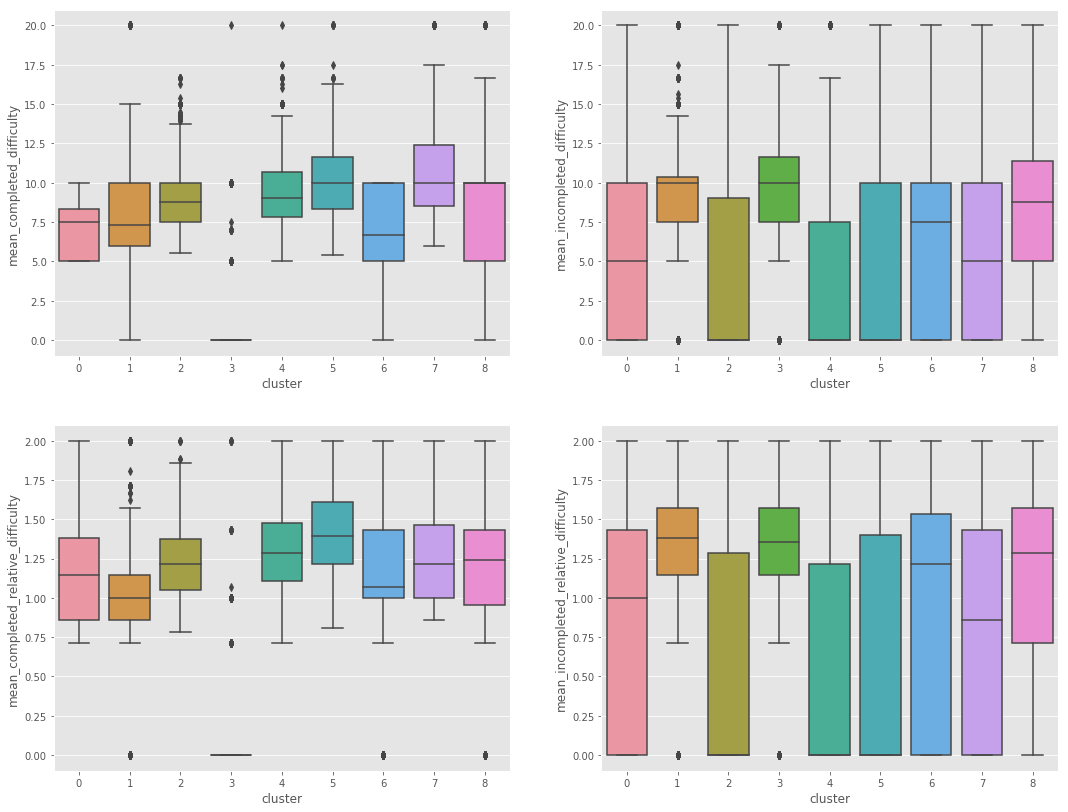

In [76]:
get_box_plots(reg_clean, difficulty_cols , 'cluster')

In [0]:
reg_clean['total_earned_reward'] = reg_clean['total_actual_reward'] - reg_clean['total_invalid_reward']

'Cluster Analysis'

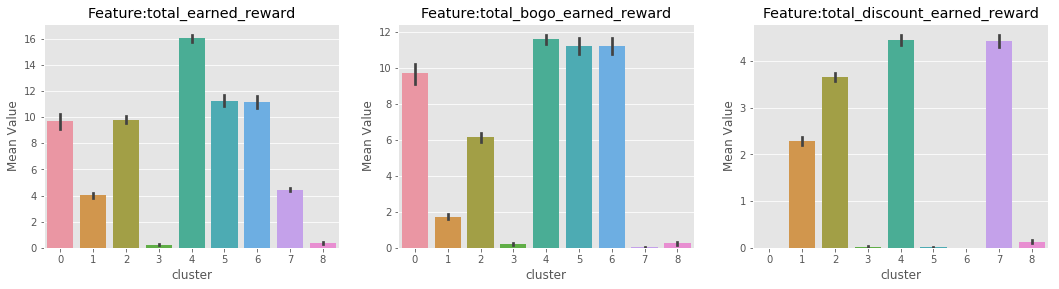

In [78]:
reward_cols = ['total_earned_reward', 'total_bogo_earned_reward', 'total_discount_earned_reward']


get_bar_plots(reg_clean, reward_cols , 'cluster',layout=331)


'Cluster Analysis'

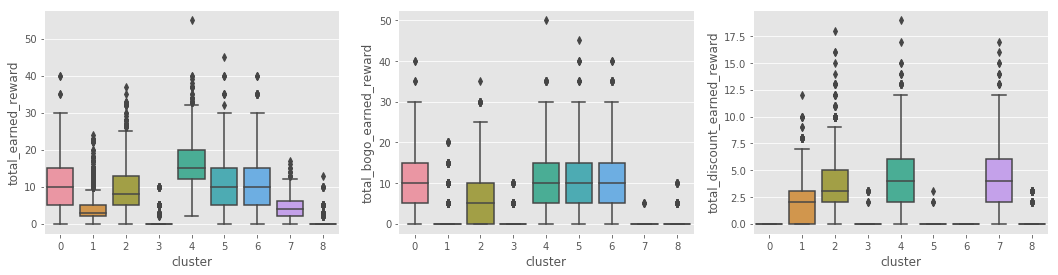

In [79]:
get_box_plots(reg_clean, reward_cols , 'cluster',layout=331)

'Cluster Analysis'

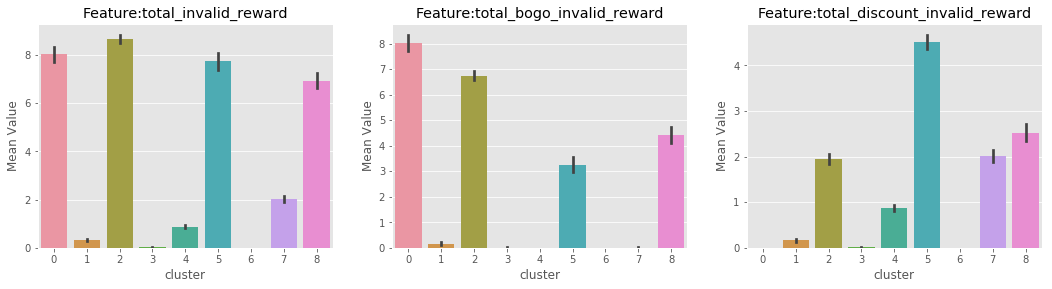

In [80]:
invalid_reward_cols = ['total_invalid_reward', 'total_bogo_invalid_reward', 'total_discount_invalid_reward']


get_bar_plots(reg_clean, invalid_reward_cols , 'cluster',layout=331)

'Cluster Analysis'

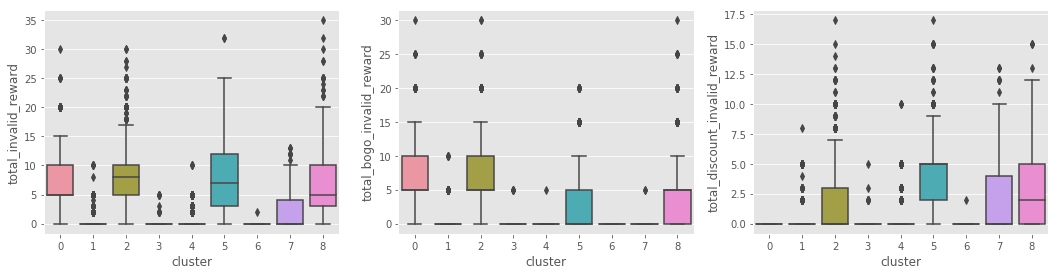

In [81]:
get_box_plots(reg_clean, invalid_reward_cols , 'cluster',layout=331)

# Rate of Spending and transactions by Cluster Segments 

'Cluster Analysis'

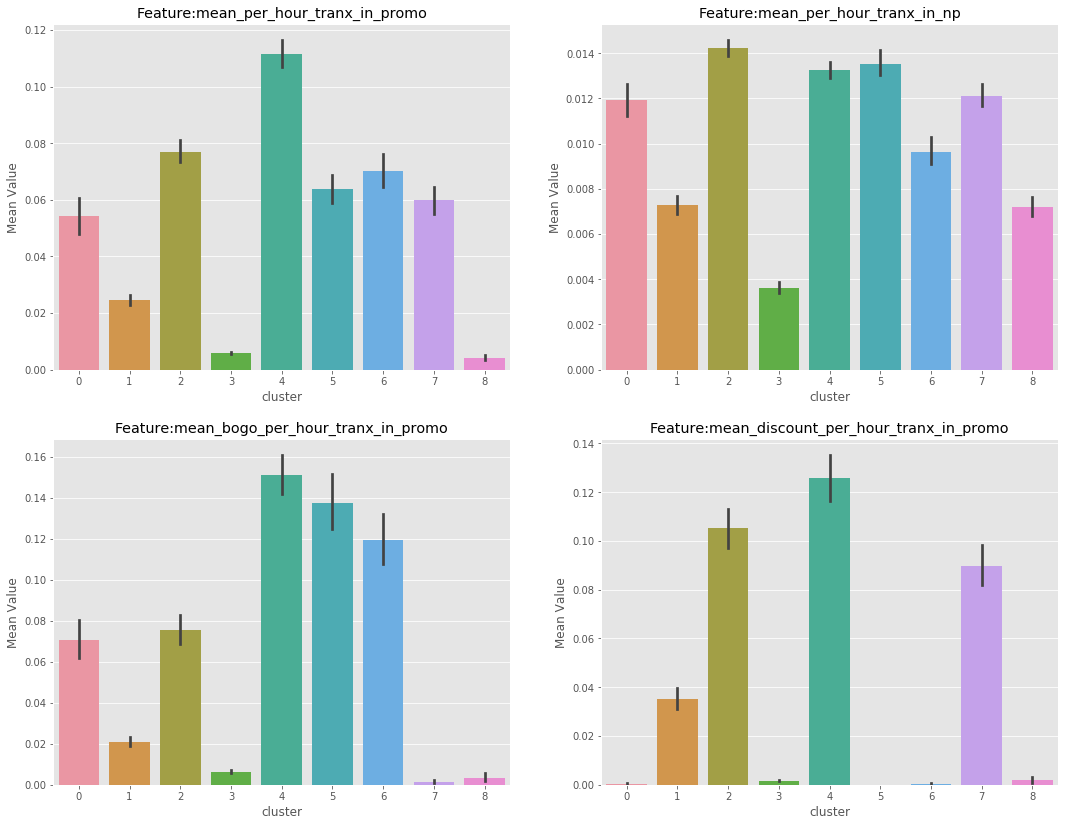

In [82]:
metric_cols = ['mean_per_hour_tranx_in_promo','mean_per_hour_tranx_in_np','mean_bogo_per_hour_tranx_in_promo','mean_discount_per_hour_tranx_in_promo']

get_bar_plots(reg_clean, metric_cols, 'cluster')

'Cluster Analysis'

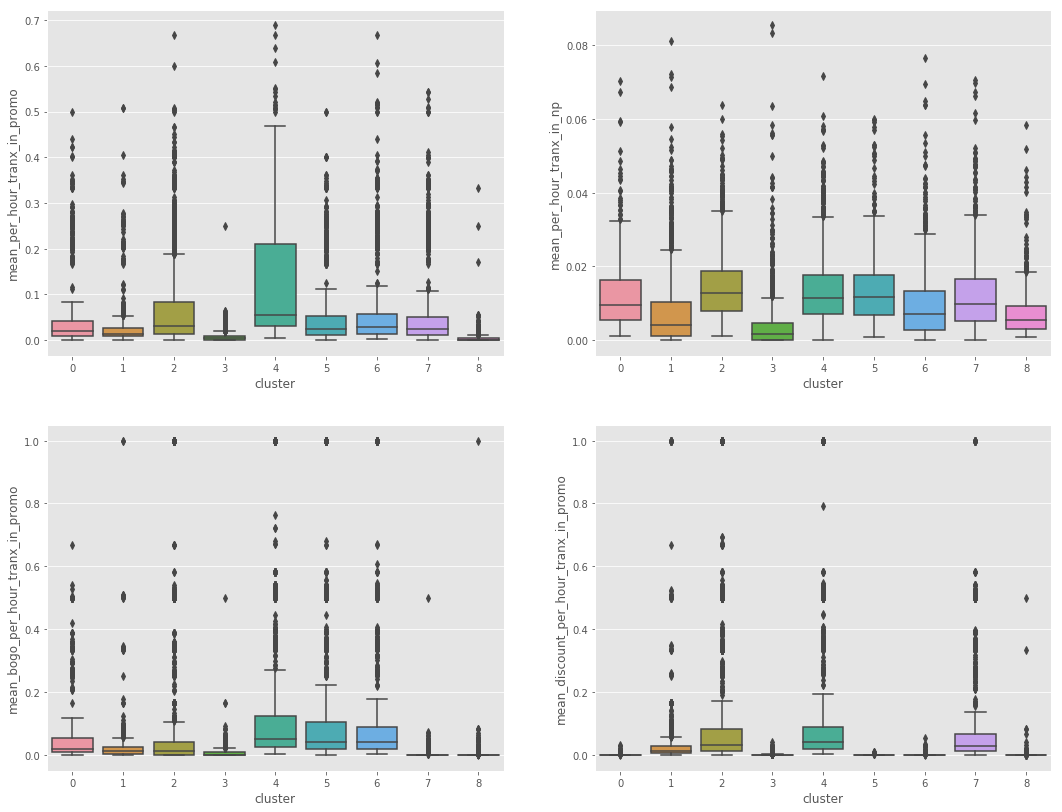

In [83]:
get_box_plots(reg_clean, metric_cols, 'cluster')

'Cluster Analysis'

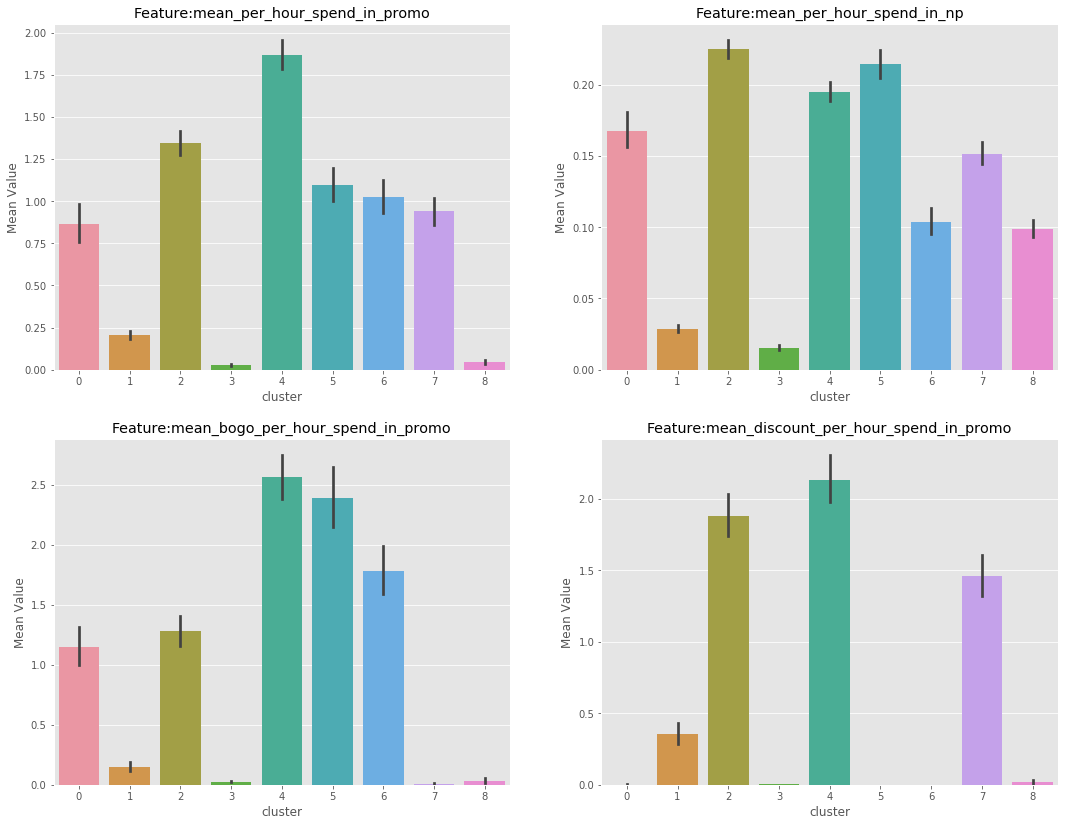

In [84]:
spend_metric_cols = ['mean_per_hour_spend_in_promo','mean_per_hour_spend_in_np','mean_bogo_per_hour_spend_in_promo','mean_discount_per_hour_spend_in_promo']

get_bar_plots(reg_clean, spend_metric_cols, 'cluster')

'Cluster Analysis'

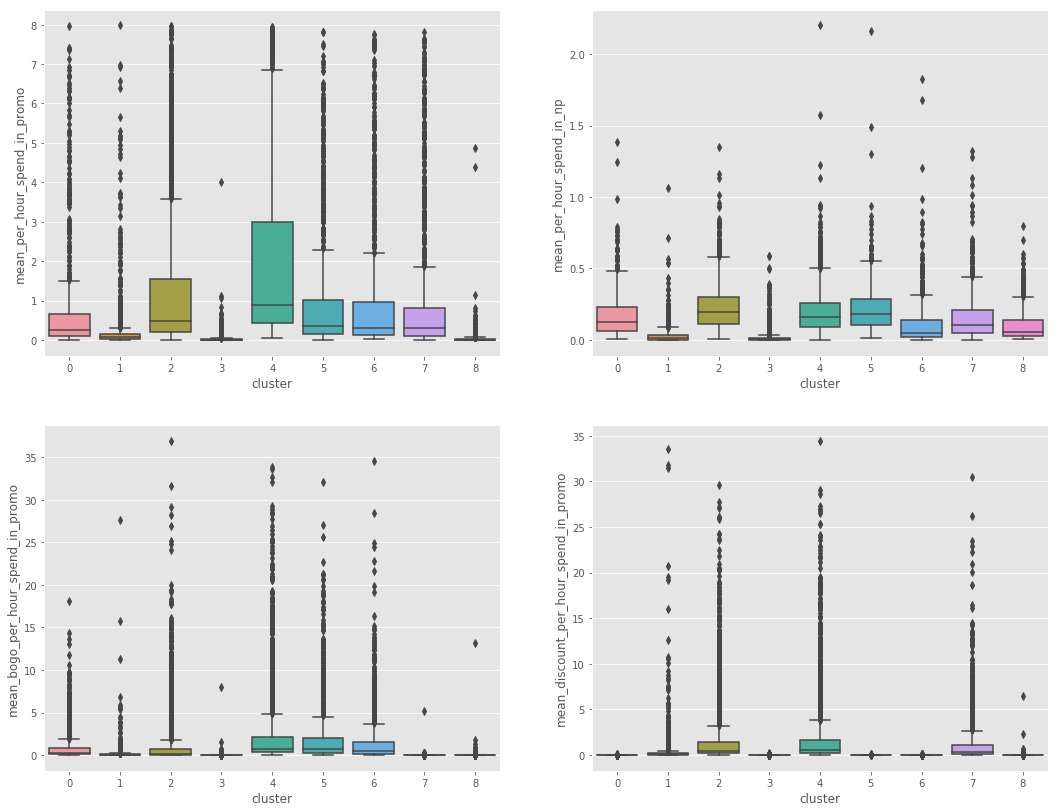

In [85]:
get_box_plots(reg_clean, spend_metric_cols, 'cluster')

'Cluster Analysis'

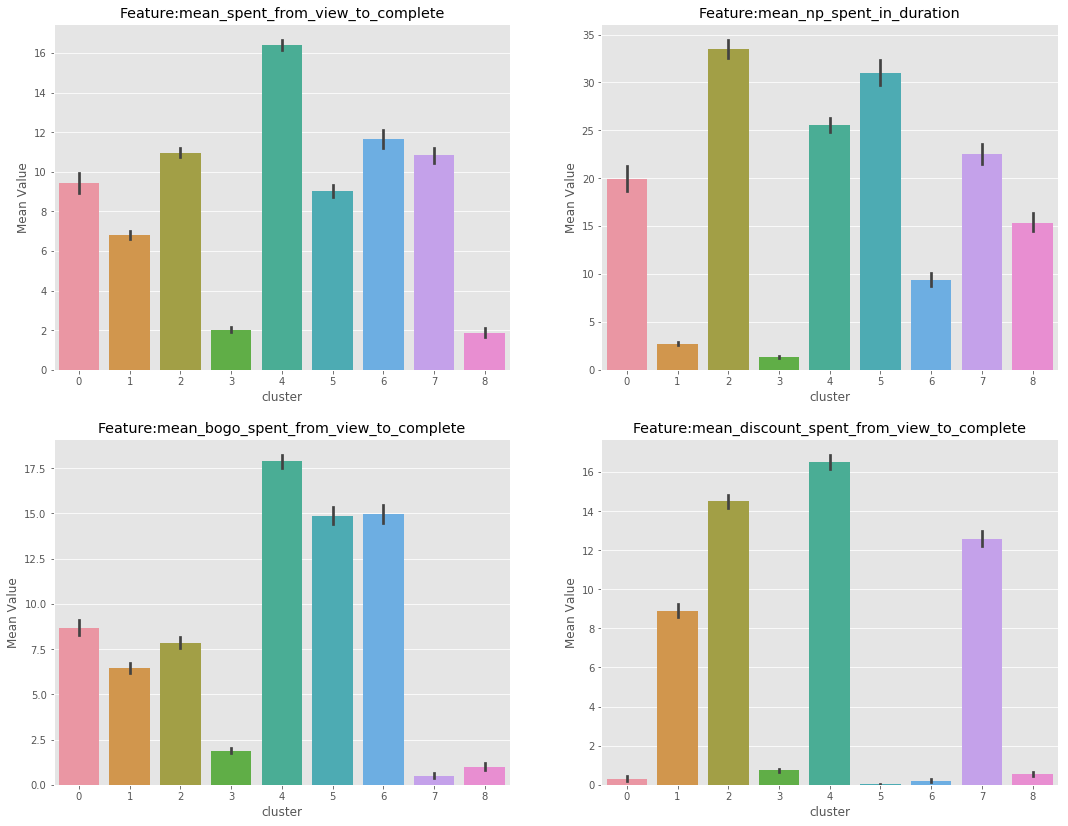

In [86]:
mean_spent_cols = ['mean_spent_from_view_to_complete','mean_np_spent_in_duration', 'mean_bogo_spent_from_view_to_complete','mean_discount_spent_from_view_to_complete']

get_bar_plots(reg_clean, mean_spent_cols, 'cluster')

# Spend per transactions by cluster segments

'Cluster Analysis'

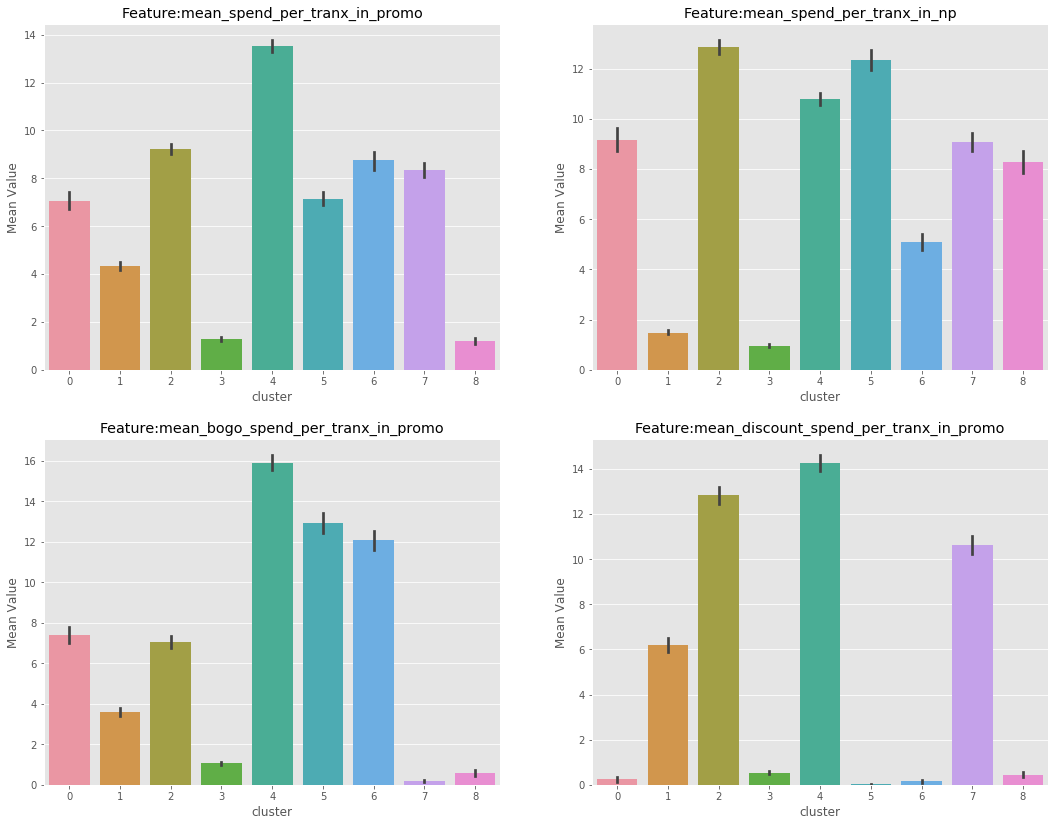

In [87]:
spend_metric_cols = ['mean_spend_per_tranx_in_promo','mean_spend_per_tranx_in_np','mean_bogo_spend_per_tranx_in_promo','mean_discount_spend_per_tranx_in_promo']

get_bar_plots(reg_clean, spend_metric_cols, 'cluster')

'Cluster Analysis'

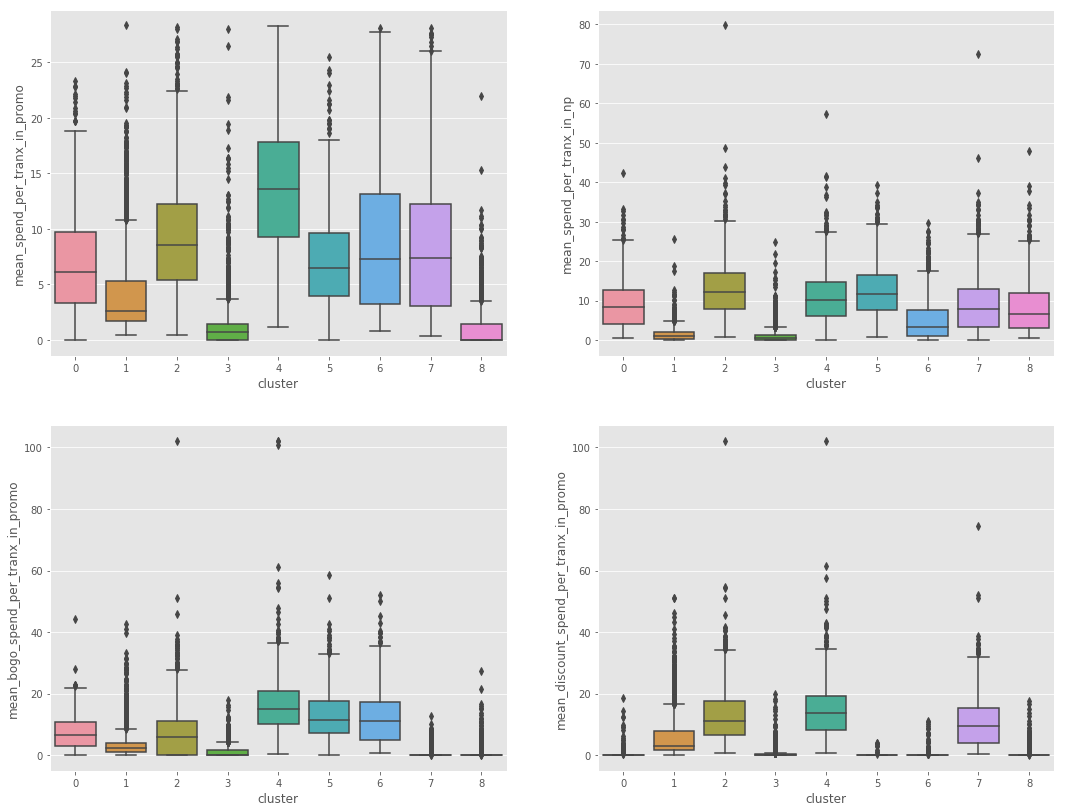

In [88]:
get_box_plots(reg_clean, spend_metric_cols, 'cluster')

# Percentage spend in promotions by cluster segments

'Cluster Analysis'

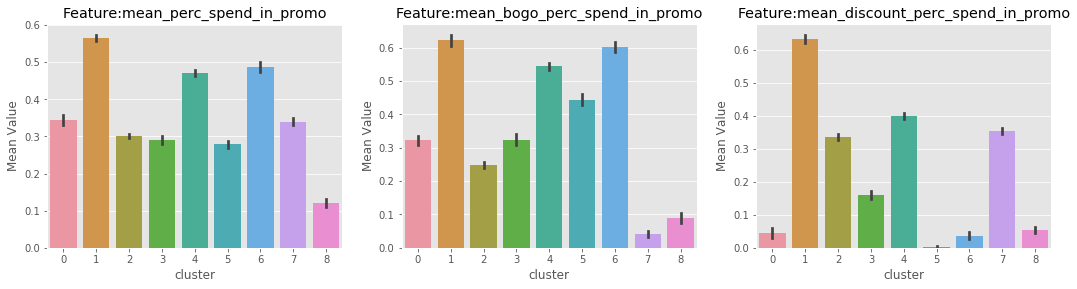

In [89]:
perc_metric_cols = ['mean_perc_spend_in_promo','mean_bogo_perc_spend_in_promo', 'mean_discount_perc_spend_in_promo']

get_bar_plots(reg_clean, perc_metric_cols, 'cluster', layout =331)

'Cluster Analysis'

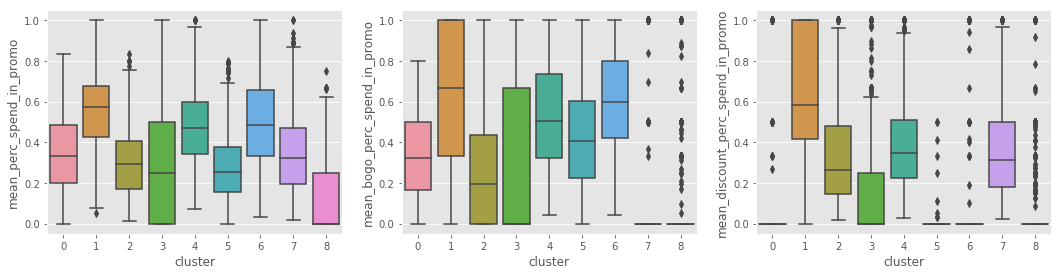

In [90]:
get_box_plots(reg_clean, perc_metric_cols, 'cluster', layout =331)

'Cluster Analysis'

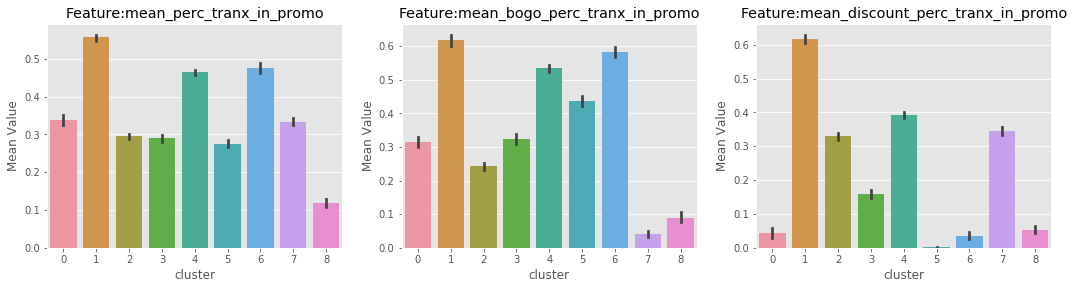

In [91]:
perc_tranx_cols = ['mean_perc_tranx_in_promo','mean_bogo_perc_tranx_in_promo', 'mean_discount_perc_tranx_in_promo']

get_bar_plots(reg_clean, perc_tranx_cols, 'cluster', layout =331)

'Cluster Analysis'

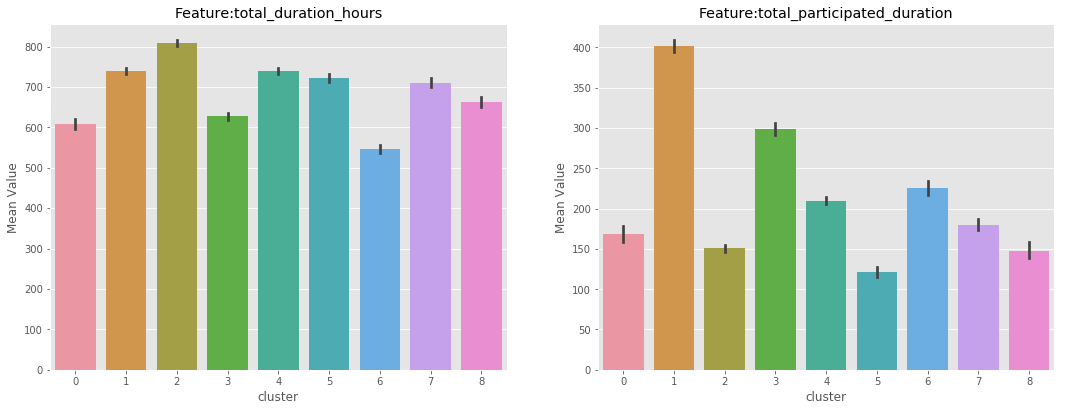

In [92]:
duration_cols = ['total_duration_hours','total_participated_duration']
get_bar_plots(reg_clean, duration_cols, 'cluster')

# Processing Cusomters with missing demographic features

In [0]:
missing_profile = person_df[person_df.age.isnull()]
missing_profile.replace([np.inf, -np.inf, np.nan], 0, inplace = True)

In [94]:
missing_profile.shape

(2174, 148)

In [0]:
missing_profile.drop(['age','income', 'gender','age_bins', 'income_bins'], axis =1, inplace=True)


In [96]:
drop_col_list

['total_informational_recieved',
 'total_informational_viewed',
 'total_informational_completed',
 'total_informational_success',
 'total_informational_invalid_complete',
 'total_informational_actual_reward',
 'total_informational_invalid_reward',
 'total_informational_duration_hours',
 'total_informational_participated_duration',
 'total_informational_tranx_from_view_to_complete',
 'total_informational_np_tranx_in_duration',
 'total_informational_spent_from_view_to_complete',
 'total_informational_np_spent_in_duration',
 'mean_informational_tranx_from_view_to_complete',
 'mean_informational_spent_from_view_to_complete',
 'mean_informational_np_tranx_in_duration',
 'mean_informational_np_spent_in_duration',
 'mean_informational_spend_per_tranx_in_promo',
 'mean_informational_spend_per_tranx_in_np',
 'mean_informational_spend_per_tranx_in_duration',
 'mean_informational_rate_of_completion',
 'mean_informational_perc_spend_in_promo',
 'mean_informational_perc_tranx_in_promo',
 'mean_info

In [0]:
missing_profile.drop(columns =drop_col_list[0:-2],axis =1, inplace=True )

In [98]:
missing_profile.shape

(2174, 113)

(2174, 23)


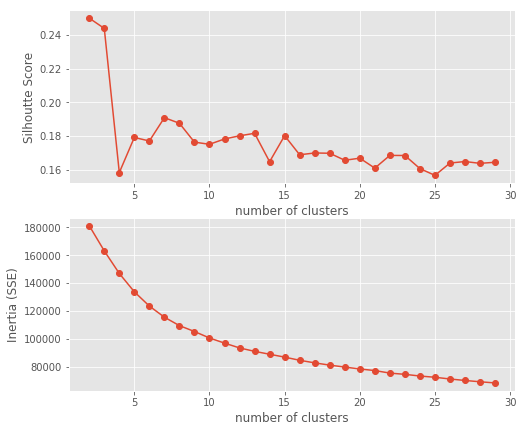

In [99]:
PT = PowerTransformer()
missing_profile_pt = pd.DataFrame(PT.fit_transform(missing_profile), columns=missing_profile.columns, index=missing_profile.index)
pca_missing_pt_gen = PCA(0.95)
pca_missing_pt = pca_missing_pt_gen.fit_transform(missing_profile_pt)
print(pca_missing_pt.shape)
finding_num_cluster(pca_missing_pt,  max_clusters =30)

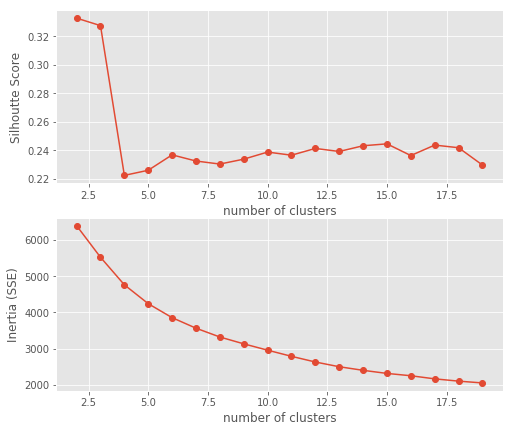

In [100]:
agglo = FeatureAgglomeration(n_clusters=7)
missing_agglo = agglo.fit_transform(missing_profile_pt)
finding_num_cluster(missing_agglo,  max_clusters =20)

In [101]:
kmeans_missing = KMeans(n_jobs = -1, n_clusters = 8, init = 'k-means++', random_state=42)
cluster_pt_m = kmeans_missing.fit_predict(pca_missing_pt)
silhouette_avg = silhouette_score(pca_missing_pt, cluster_pt_m)
sse = kmeans_missing.inertia_

print("The silhouette index is" ,silhouette_avg)
print("The SSE / inertia value is", sse)

The silhouette index is 0.18751598133054834
The SSE / inertia value is 109411.31790142121


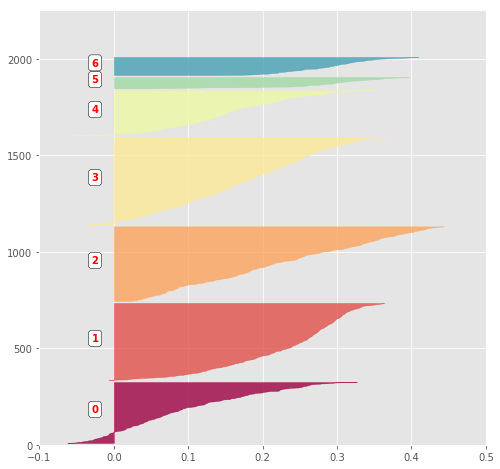

In [102]:
sample_silhouette_values_pt_m = silhouette_samples(pca_missing_pt, cluster_pt_m)
graph_component_silhouette(7, [-0.1, 0.5], len(pca_missing_pt), sample_silhouette_values_pt_m, cluster_pt_m)

The silhouette index is 0.3273792372073167
The SSE / inertia value is 5521.947363585232


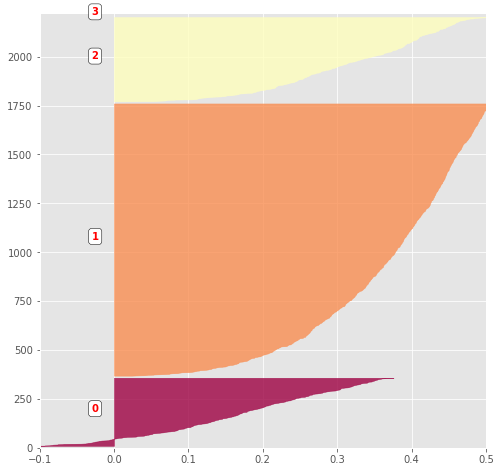

In [103]:
kmeans_missing = KMeans(n_jobs = -1, n_clusters = 3, init = 'k-means++', random_state=42)
cluster_ag_m = kmeans_missing.fit_predict(missing_agglo)
silhouette_avg = silhouette_score(missing_agglo, cluster_ag_m)
sse = kmeans_missing.inertia_

print("The silhouette index is" ,silhouette_avg)
print("The SSE / inertia value is", sse)

sample_silhouette_values_ag_m = silhouette_samples(missing_agglo, cluster_ag_m)
graph_component_silhouette(4, [-0.1, 0.5], len(missing_agglo), sample_silhouette_values_ag_m, cluster_ag_m)


In [0]:
tsne_m = TSNE(n_components=2, verbose=0, perplexity=40, n_iter =500, n_iter_without_progress =200, random_state=42 )
tsne_mp_results = tsne_m.fit_transform(missing_agglo)
#print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

tsne_mp_df = pd.DataFrame(tsne_mp_results, columns=['xs', 'ys'])


Text(0.5, 1.0, 'Missing Profile Cluster with TSNE')

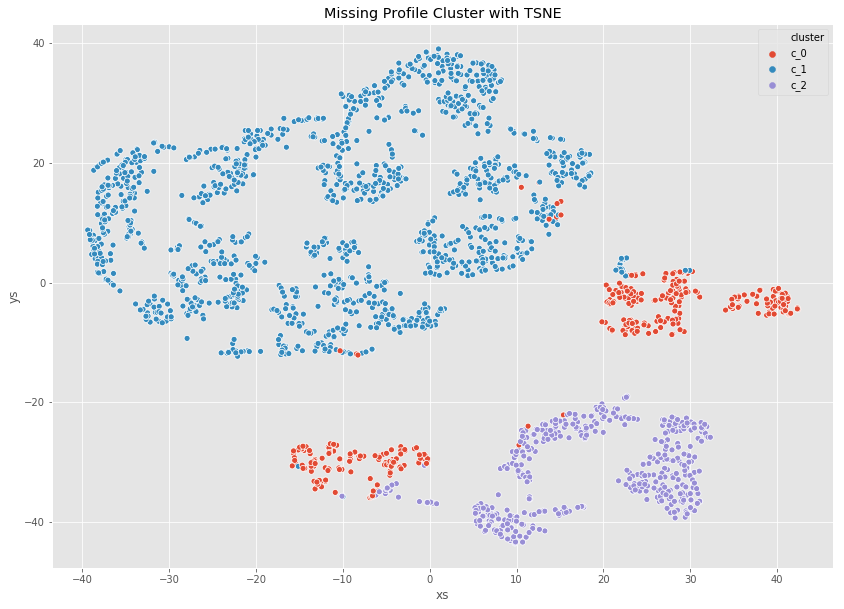

In [105]:


tsne_mp_df['cluster'] = ['c_' + str(i) for i in cluster_ag_m]

#plot tsne
f,ax = plt.subplots(figsize=(14,10))
sns.scatterplot('xs','ys', hue='cluster', data=tsne_mp_df, ax=ax, hue_order=['c_' + str(i) for i in range(0,3)])
ax.set_title("Missing Profile Cluster with TSNE")
#save fig
#f.savefig('main_tsne2.png', dpi = 300)

In [106]:
missing_profile['cluster'] = cluster_ag_m
missing_profile.groupby('cluster')['cluster'].count()



cluster
0     349
1    1393
2     432
Name: cluster, dtype: int64

'Cluster Analysis'

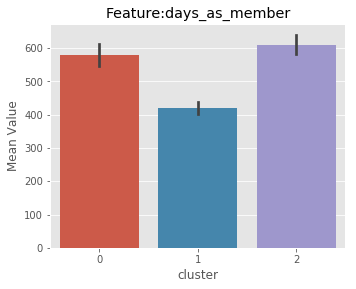

In [107]:
get_bar_plots(missing_profile, ['days_as_member'], 'cluster', layout=331)

'Cluster Analysis'

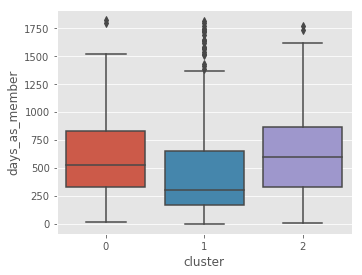

In [129]:
get_box_plots(missing_profile, ['days_as_member'], 'cluster', layout=331)

'Cluster Analysis'

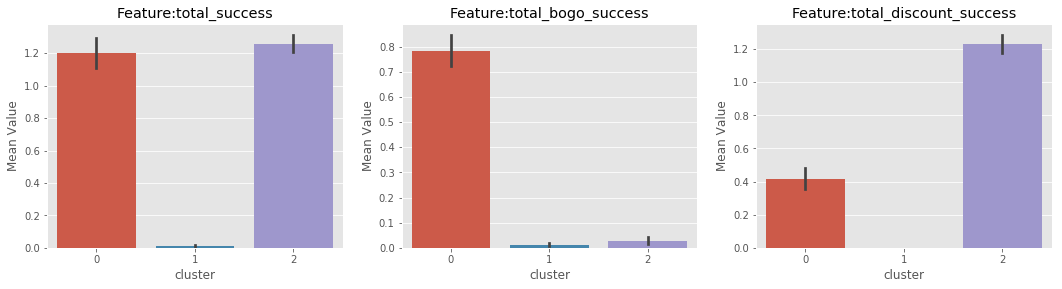

In [108]:
success_cols =['total_success', 'total_bogo_success', 'total_discount_success']
get_bar_plots(missing_profile, success_cols, 'cluster', layout=331)

'Cluster Analysis'

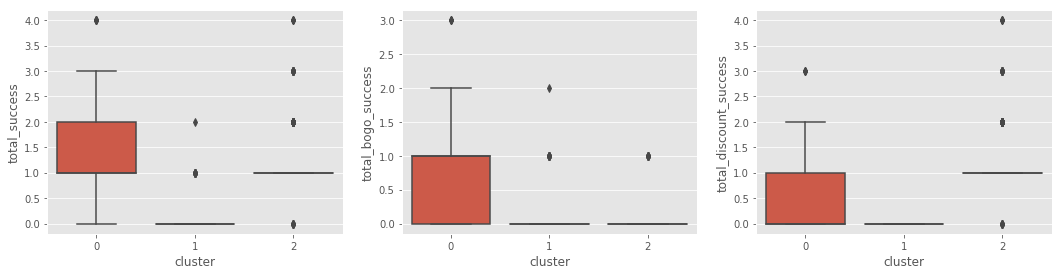

In [109]:
get_box_plots(missing_profile, success_cols, 'cluster', layout=331)

'Cluster Analysis'

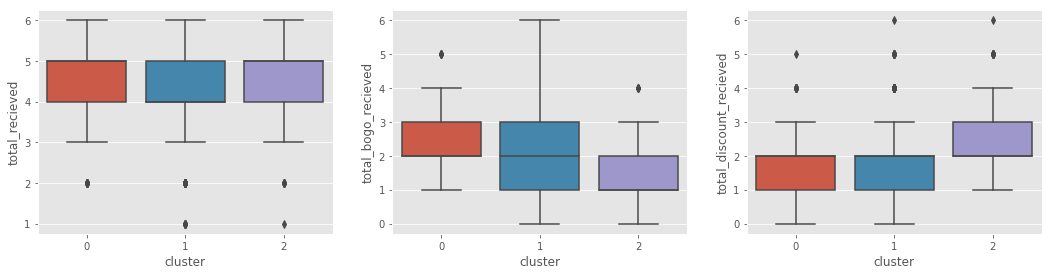

In [110]:
get_box_plots(missing_profile,recieved_cols, 'cluster', layout=331)

'Cluster Analysis'

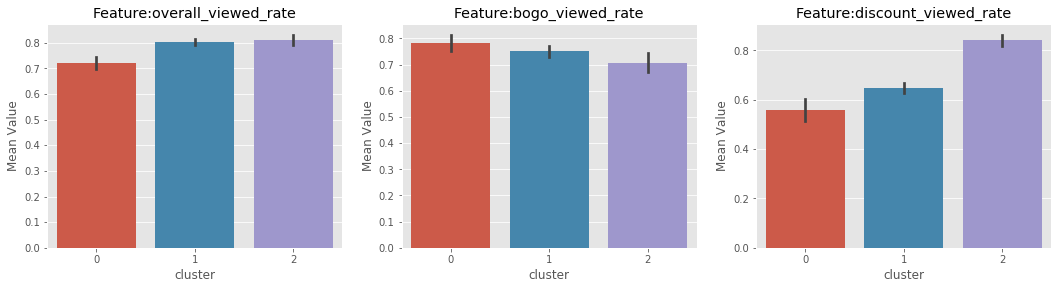

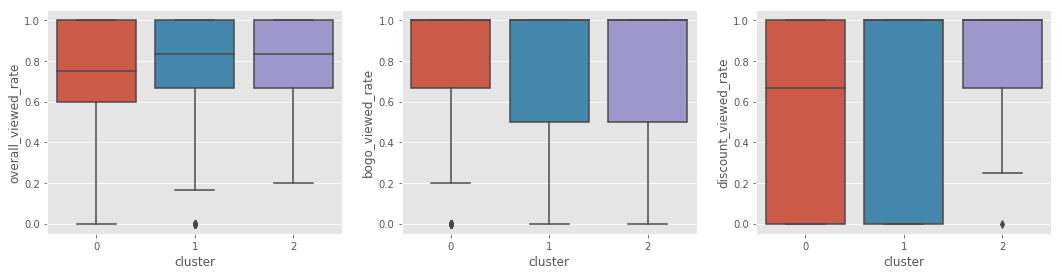

In [115]:
viewed_cols = ['overall_viewed_rate', 'bogo_viewed_rate', 'discount_viewed_rate']
get_bar_plots(missing_profile, viewed_cols, 'cluster',layout=331)
get_box_plots(missing_profile, viewed_cols, 'cluster',layout=331)

'Cluster Analysis'

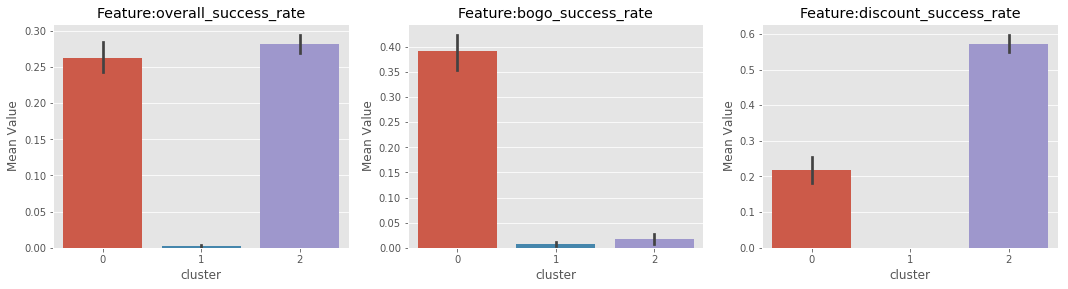

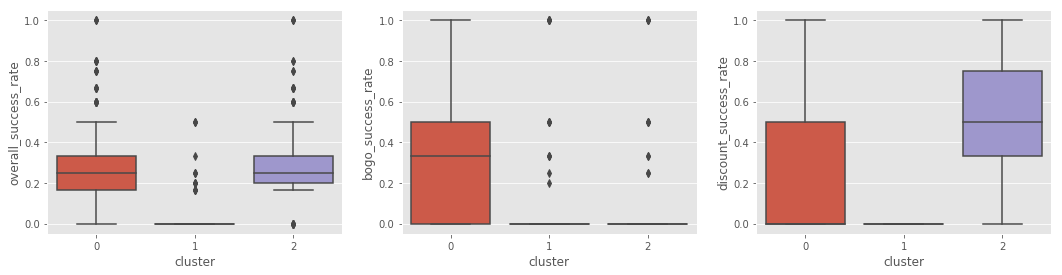

In [111]:
get_bar_plots(missing_profile, success_rate_cols, 'cluster', layout=331)

get_box_plots(missing_profile, success_rate_cols, 'cluster', layout =331)

'Cluster Analysis'

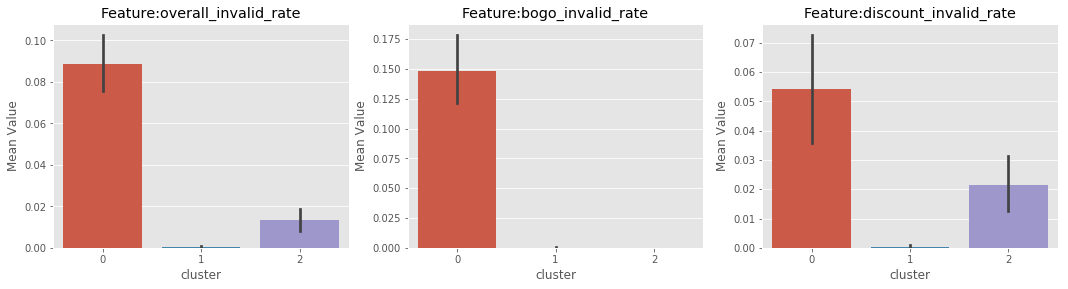

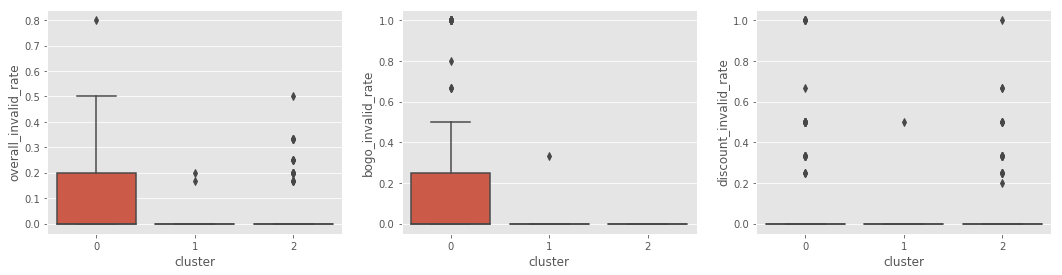

In [113]:

get_bar_plots(missing_profile, invalid_rate_cols, 'cluster', layout=331)
get_box_plots(missing_profile, invalid_rate_cols, 'cluster', layout=331)

'Cluster Analysis'

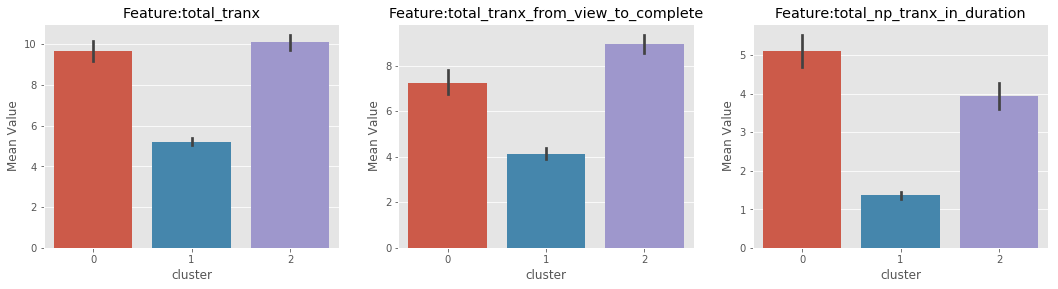

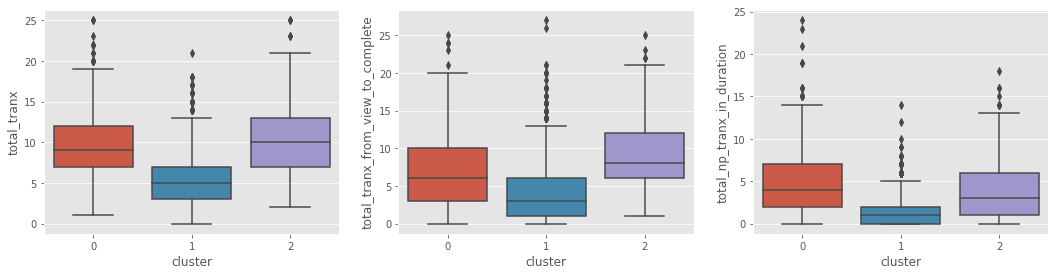

In [116]:

get_bar_plots(missing_profile, transactions_cols, 'cluster',layout=331)
get_box_plots(missing_profile, transactions_cols, 'cluster',layout=331)


'Cluster Analysis'

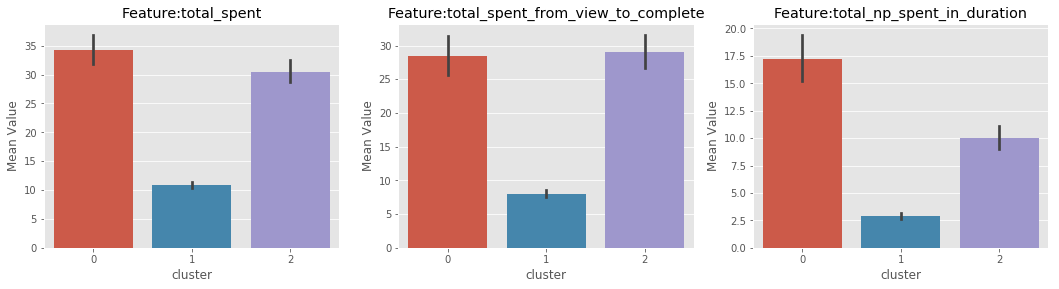

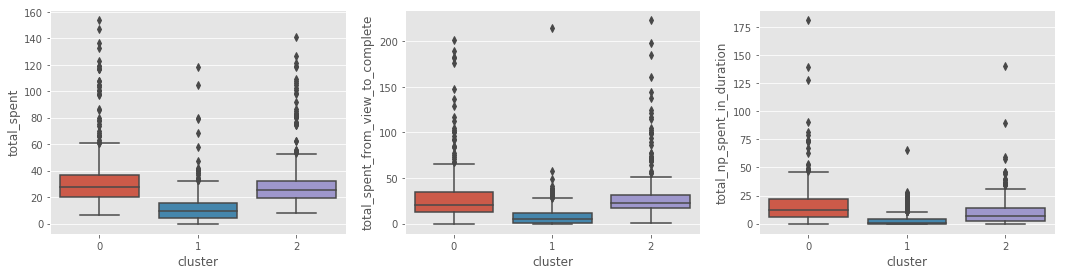

In [130]:
get_bar_plots(missing_profile, spent_cols, 'cluster', layout =331)
get_box_plots(missing_profile, spent_cols, 'cluster',layout =331)



'Cluster Analysis'

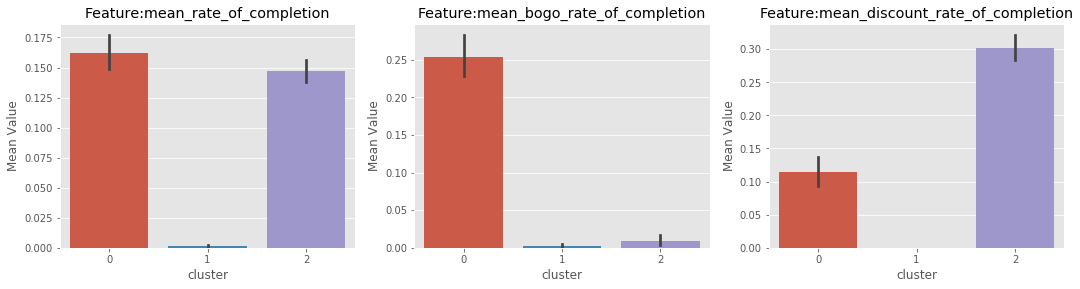

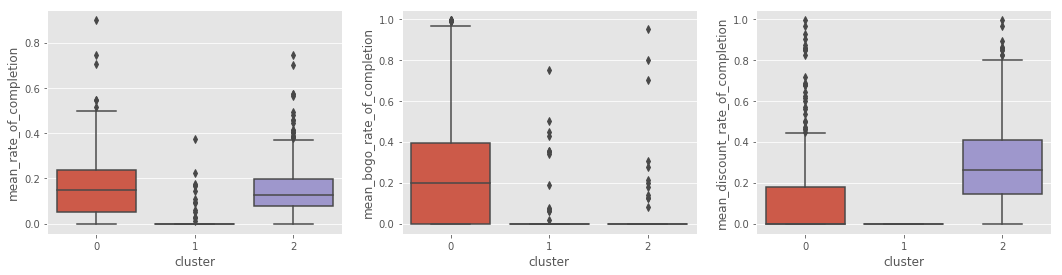

In [118]:
get_bar_plots(missing_profile, rate_of_completion_cols , 'cluster',layout=331)
get_box_plots(missing_profile, rate_of_completion_cols , 'cluster',layout=331)



'Cluster Analysis'

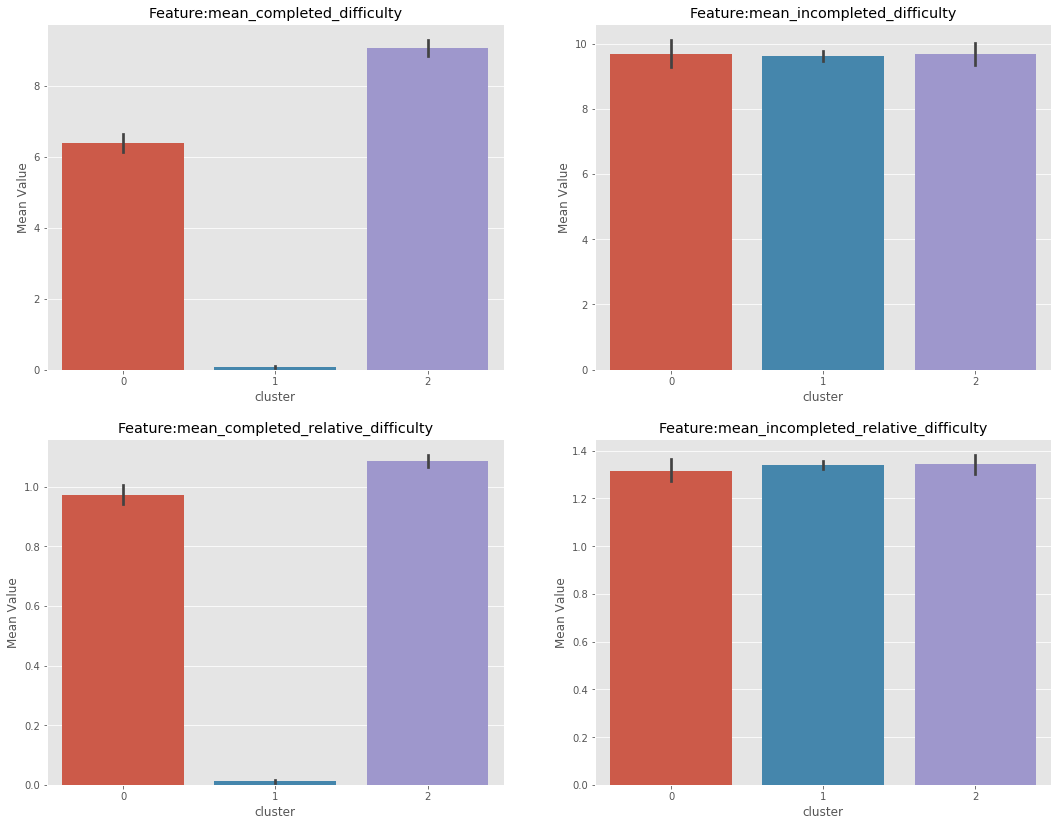

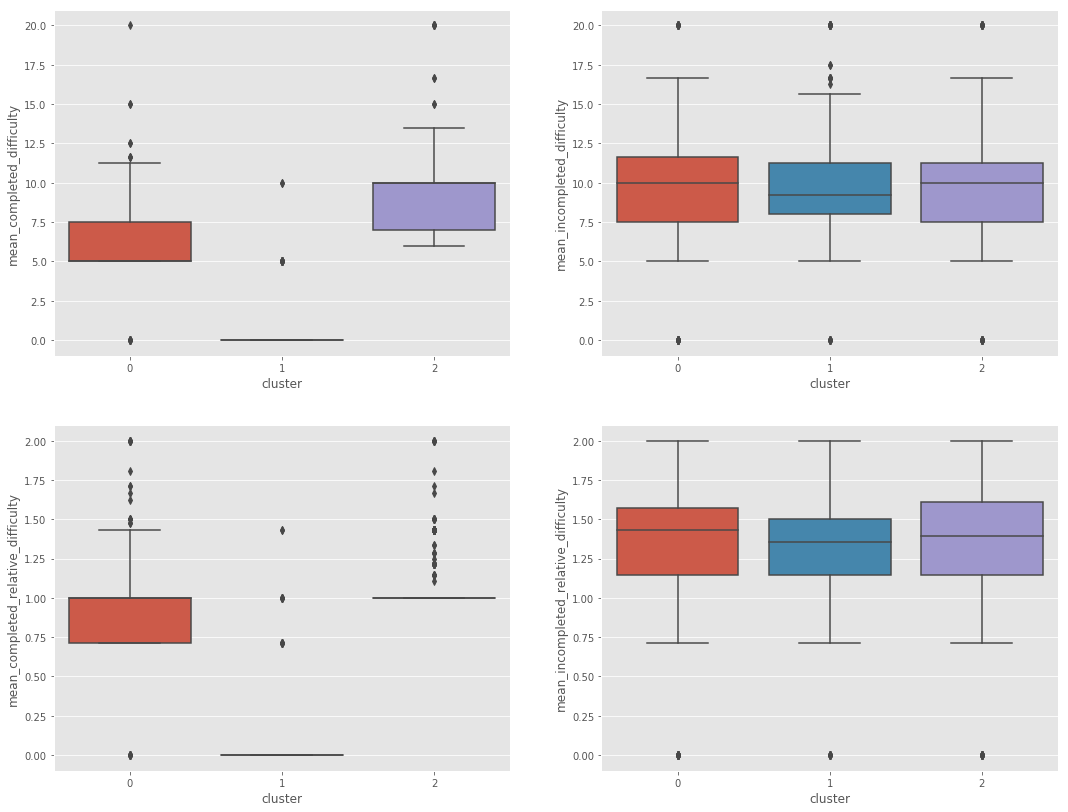

In [121]:
get_bar_plots(missing_profile, difficulty_cols , 'cluster')
get_box_plots(missing_profile, difficulty_cols , 'cluster')


'Cluster Analysis'

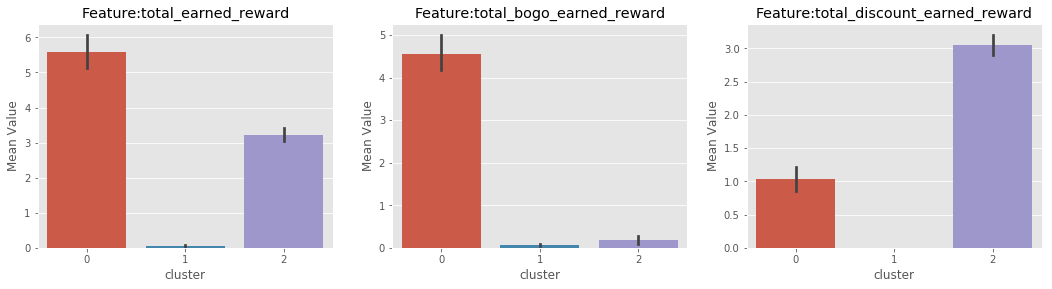

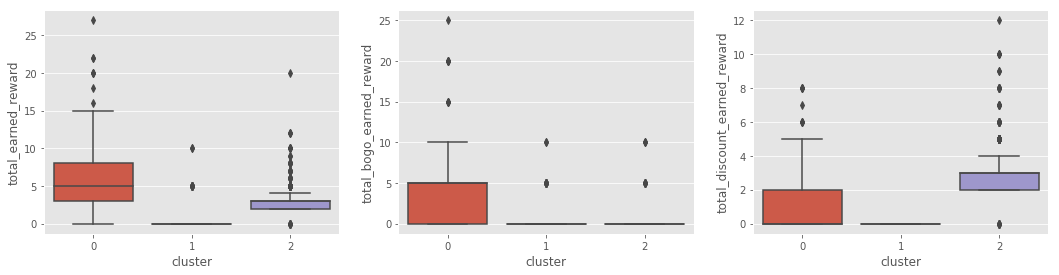

In [122]:
missing_profile['total_earned_reward'] = missing_profile['total_actual_reward'] - missing_profile['total_invalid_reward']

get_bar_plots(missing_profile, reward_cols , 'cluster',layout=331)
get_box_plots(missing_profile, reward_cols , 'cluster',layout=331)



'Cluster Analysis'

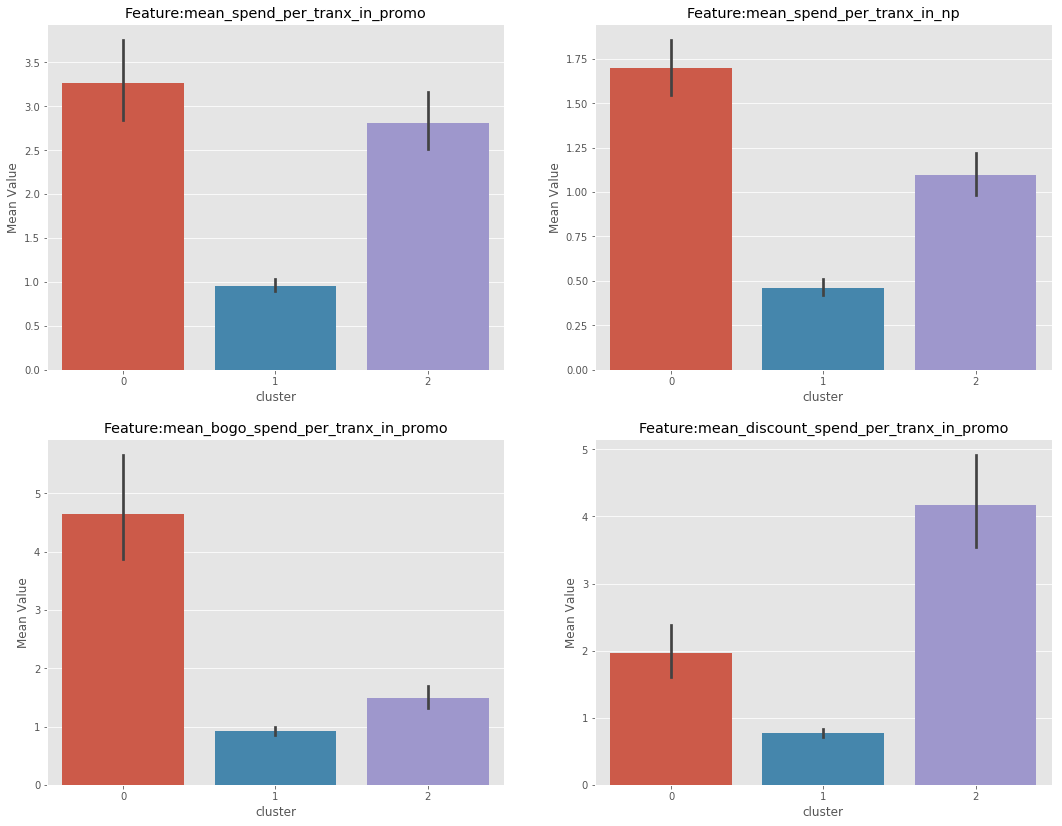

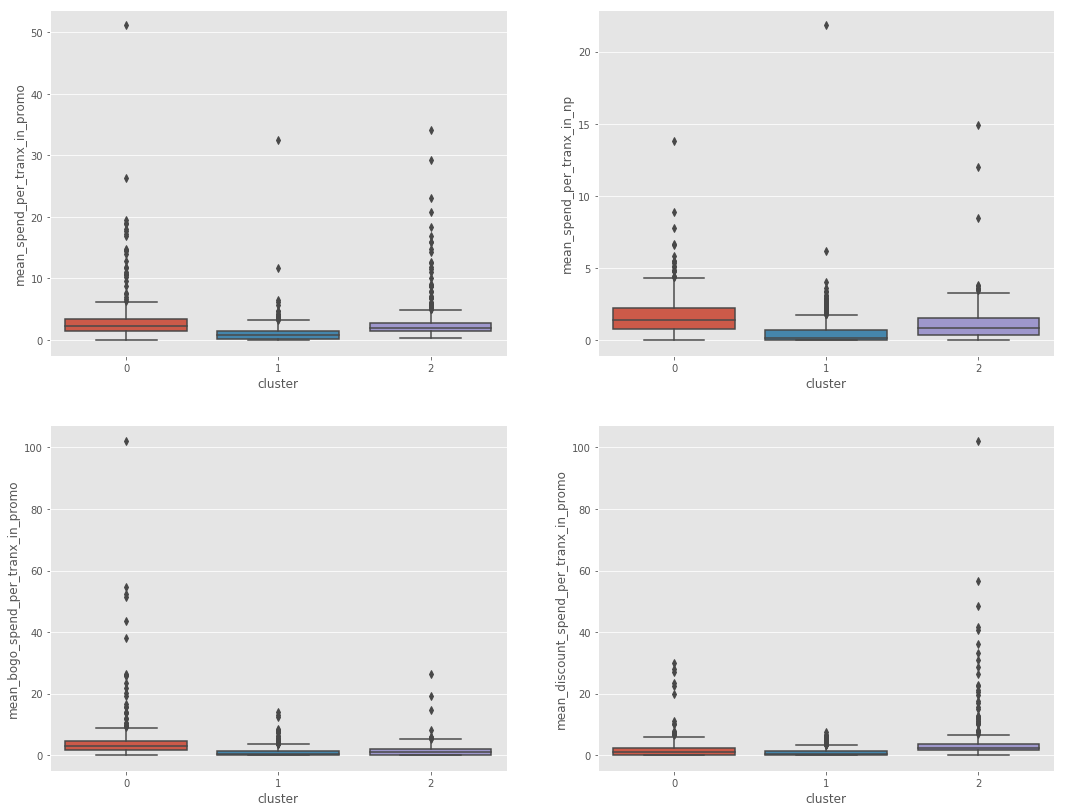

In [125]:
get_bar_plots(missing_profile, spend_metric_cols, 'cluster')
get_box_plots(missing_profile, spend_metric_cols, 'cluster')



'Cluster Analysis'

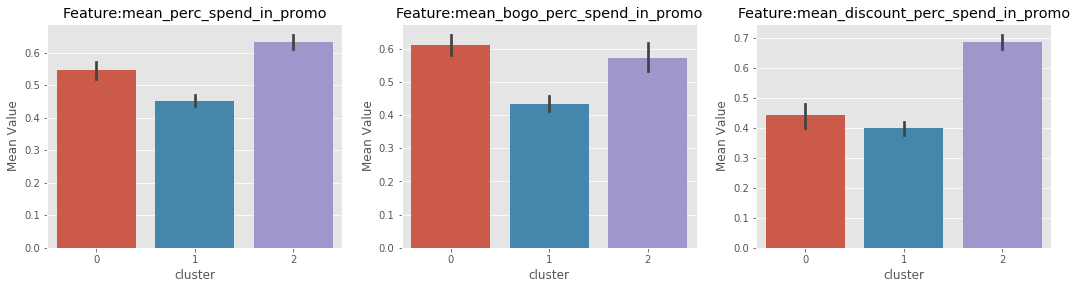

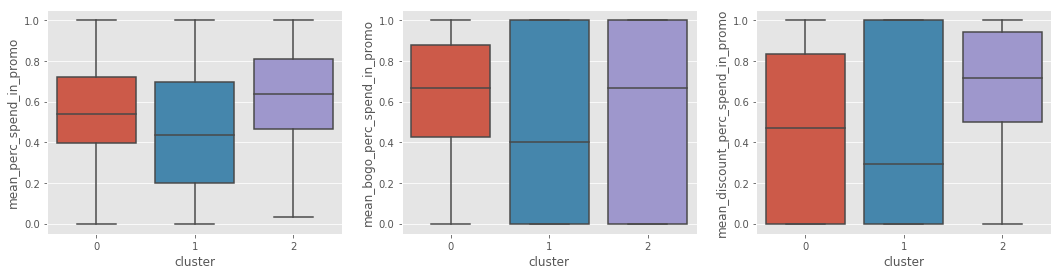

In [126]:
get_bar_plots(missing_profile, perc_metric_cols, 'cluster', layout =331)
get_box_plots(missing_profile, perc_metric_cols, 'cluster', layout =331)


'Cluster Analysis'

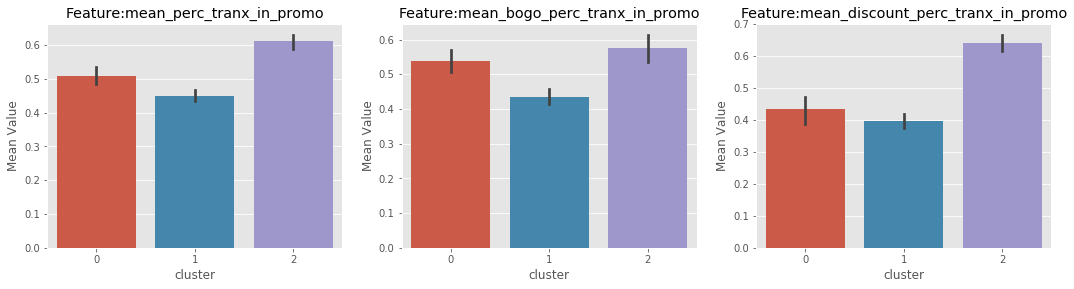

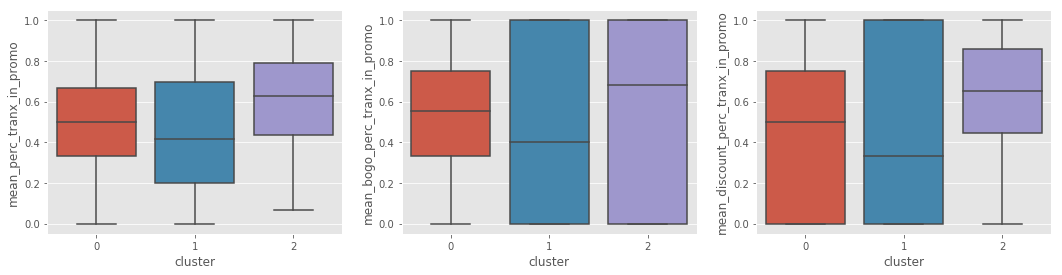

In [127]:
get_bar_plots(missing_profile, perc_tranx_cols, 'cluster', layout =331)
get_box_plots(missing_profile, perc_tranx_cols, 'cluster', layout =331)

'Cluster Analysis'

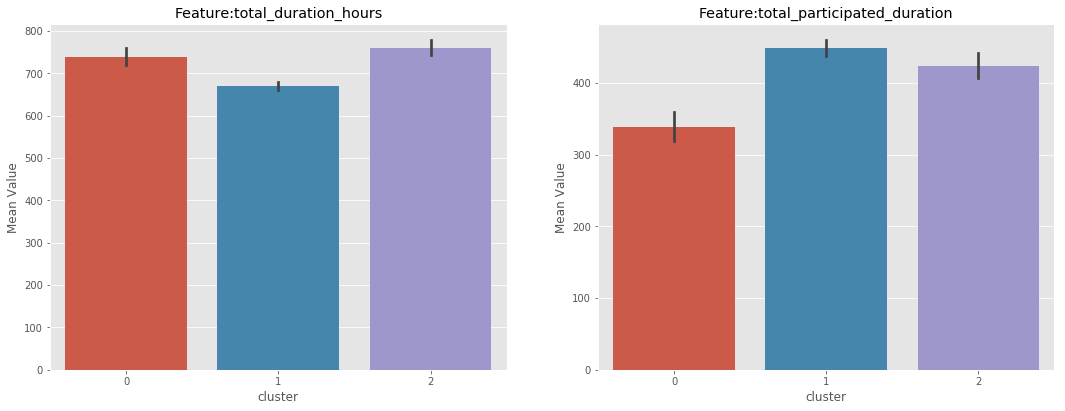

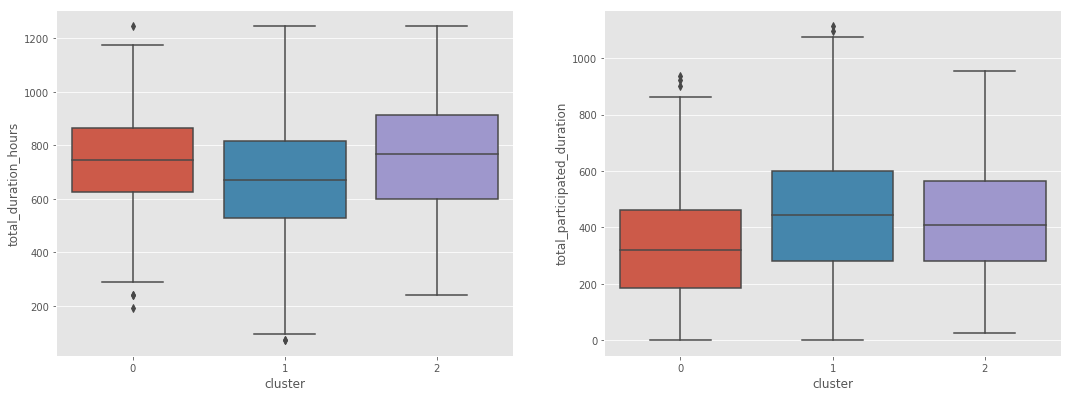

In [128]:
get_bar_plots(missing_profile, duration_cols, 'cluster')
get_box_plots(missing_profile, duration_cols, 'cluster')
